In [1]:
# General / Common libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()
import pyfolio as pf

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


# US Stocks

## SOX vs S&P

In [2]:
sp_adj_close, sox_adj_close = pdr.get_data_yahoo("^GSPC", start="2012-01-01", end="2022-06-30")["Adj Close"], pdr.get_data_yahoo("^SOX", start="2012-01-01", end="2022-06-30")["Adj Close"]
sp_return_series, sox_return_series = ((1 + sp_adj_close.pct_change()).cumprod() - 1), ((1 + sox_adj_close.pct_change()).cumprod() - 1) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [3]:
sp_max_text = '{:,.0%}'.format(round(sp_return_series.loc[sp_return_series.idxmax()], 2))
sox_max_text = '{:,.0%}'.format(round(sox_return_series.loc[sox_return_series.idxmax()], 2))
sp_max_text, sox_max_text

('276%', '996%')

C:\Users\DVH\AppData\Local\Temp\ipykernel_22580\3990189427.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])
C:\Users\DVH\AppData\Local\Temp\ipykernel_22580\3990189427.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])


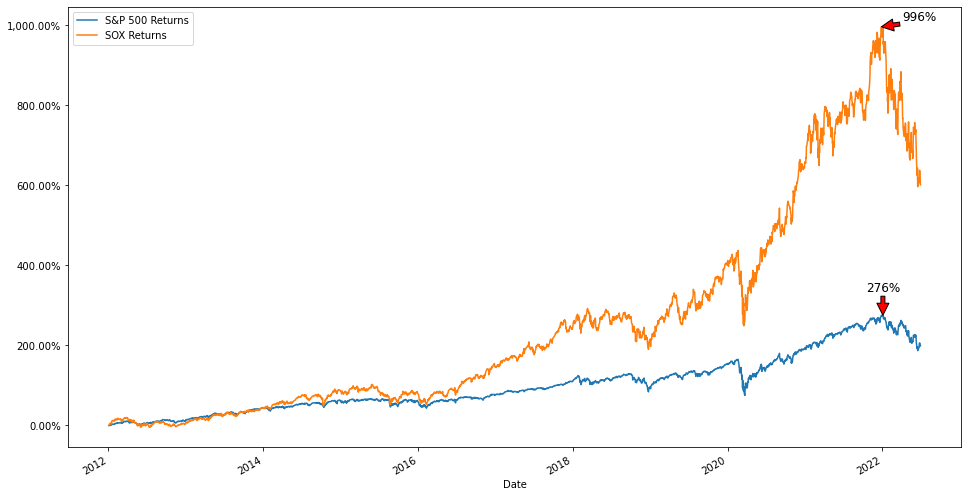

In [4]:
ax1, ax2 = sp_return_series.plot(label="S&P 500 Returns", figsize=(16, 9)), sox_return_series.plot(label="SOX Returns", figsize=(16, 9))
vals1, vals2 = ax1.get_yticks(), ax2.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])
plt.annotate(sp_max_text, (sp_return_series.idxmax(), sp_return_series.loc[sp_return_series.idxmax()]), xytext=(sp_return_series.idxmax(), sp_return_series.loc[sp_return_series.idxmax()]+0.6), fontsize=12, ha='center', arrowprops=dict(facecolor='red'))
plt.annotate(sox_max_text, (sox_return_series.idxmax(), sox_return_series.loc[sox_return_series.idxmax()]), xytext=("2022-04-02 00:00:00", sox_return_series.loc[sox_return_series.idxmax()]+0.15), fontsize=12, arrowprops=dict(facecolor='red'))
plt.legend()
plt.show()

## S&P Capital Goods (Industry Group) vs S&P

In [5]:
cap_adj_close = pdr.get_data_yahoo("^SP500-2010", start="2012-01-01", end="2022-06-30")["Adj Close"]
cap_return_series = ((1 + cap_adj_close.pct_change()).cumprod() - 1) 

[*********************100%***********************]  1 of 1 completed


In [6]:
cap_max_text = '{:,.0%}'.format(round(cap_return_series.loc[cap_return_series.idxmax()], 2))
cap_max_text

'186%'

C:\Users\DVH\AppData\Local\Temp\ipykernel_22580\2117961535.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])
C:\Users\DVH\AppData\Local\Temp\ipykernel_22580\2117961535.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])


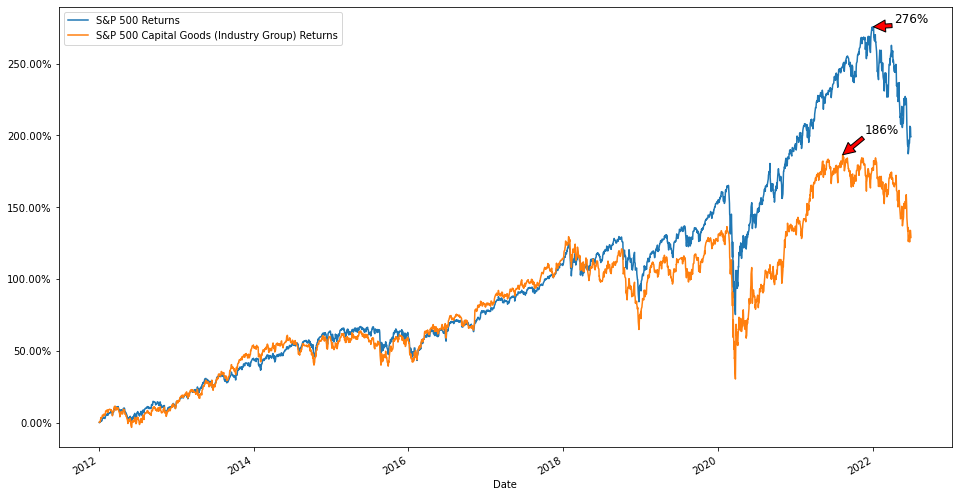

In [7]:
ax1, ax2 = sp_return_series.plot(label="S&P 500 Returns", figsize=(16, 9)), cap_return_series.plot(label="S&P 500 Capital Goods (Industry Group) Returns", figsize=(16, 9))
vals1, vals2 = ax1.get_yticks(), ax2.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])
plt.annotate(sp_max_text, (sp_return_series.idxmax(), sp_return_series.loc[sp_return_series.idxmax()]), xytext=("2022-06-30 00:00:00", sp_return_series.loc[sp_return_series.idxmax()]+0.03), fontsize=12, ha='center', arrowprops=dict(facecolor='red'))
plt.annotate(cap_max_text, (cap_return_series.idxmax(), cap_return_series.loc[cap_return_series.idxmax()]), xytext=("2021-11-25 00:00:00", cap_return_series.loc[cap_return_series.idxmax()]+0.15), fontsize=12, arrowprops=dict(facecolor='red'))
plt.legend()
plt.show()

# SG Stocks

## SOX vs STI

In [8]:
sti_adj_close = pdr.get_data_yahoo("^STI", start="2012-01-01", end="2022-06-30")["Adj Close"]
sti_return_series = ((1 + sti_adj_close.pct_change()).cumprod() - 1) 

[*********************100%***********************]  1 of 1 completed


In [9]:
sti_max_text = '{:,.0%}'.format(round(sti_return_series.loc[sti_return_series.idxmax()], 2))
sti_max_text

'34%'

C:\Users\DVH\AppData\Local\Temp\ipykernel_22580\1529294116.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])
C:\Users\DVH\AppData\Local\Temp\ipykernel_22580\1529294116.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])


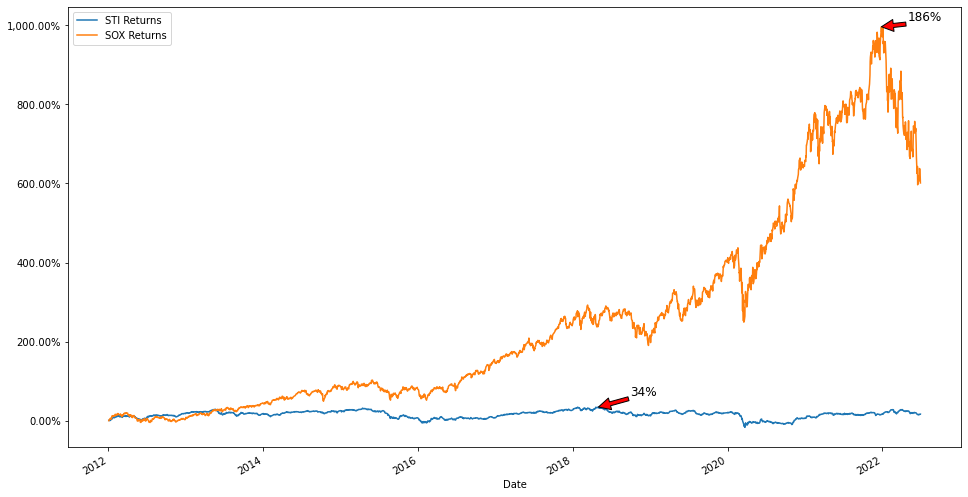

In [10]:
ax1, ax2 = sti_return_series.plot(label="STI Returns", figsize=(16, 9)), sox_return_series.plot(label="SOX Returns", figsize=(16, 9))
vals1, vals2 = ax1.get_yticks(), ax2.get_yticks()
ax1.set_yticklabels(['{:,.2%}'.format(x) for x in vals1])
ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals2])
plt.annotate(sti_max_text, (sti_return_series.idxmax(), sti_return_series.loc[sti_return_series.idxmax()]), xytext=("2018-12-02 00:00:00", sti_return_series.loc[sti_return_series.idxmax()]+0.30), fontsize=12, ha='center', arrowprops=dict(facecolor='red'))
plt.annotate(cap_max_text, (sox_return_series.idxmax(), sox_return_series.loc[sox_return_series.idxmax()]), xytext=('2022-05-01 00:00:00', sox_return_series.loc[sox_return_series.idxmax()]+0.15), fontsize=12, arrowprops=dict(facecolor='red'))
plt.legend()
plt.show()

## Netflix

In [2]:
netflix_data = pdr.get_data_yahoo("NFLX", start="2009-01-01", end="2019-12-31")
netflix_close = netflix_data["Close"]
netflix_adj_close = netflix_data["Adj Close"]

[*********************100%***********************]  1 of 1 completed


In [3]:
# check if 10x

round((netflix_close.tail(1).values / netflix_close.head(1).values)[0], 3)

75.717

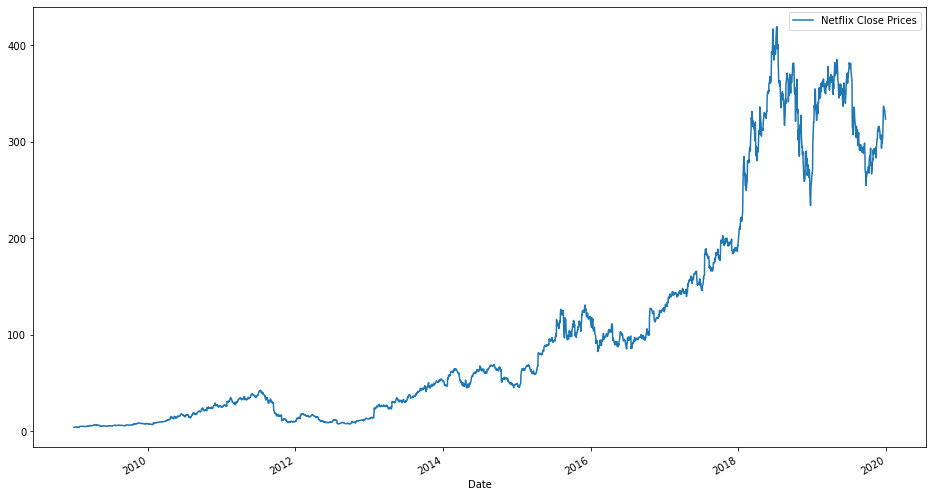

In [4]:
netflix_close.plot(label="Netflix Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [5]:
# pct change

netflix_pct_change = netflix_close.pct_change()
netflix_pct_change.head()

Date
2008-12-31         NaN
2009-01-02   -0.000669
2009-01-05    0.069300
2009-01-06    0.031309
2009-01-07   -0.006982
Name: Close, dtype: float64

In [6]:
# which day had the worst single day returns

netflix_pct_change.idxmin()

Timestamp('2011-10-25 00:00:00')

In [7]:
# which day had the best single day returns

netflix_pct_change.idxmax()

Timestamp('2013-01-24 00:00:00')

In [8]:
# std to assess risk

netflix_pct_change.std()

0.03244552989808973

In [9]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [10]:
netflix_sma_30 = netflix_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
netflix_wma_30 = netflix_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
netflix_ema_30 = netflix_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

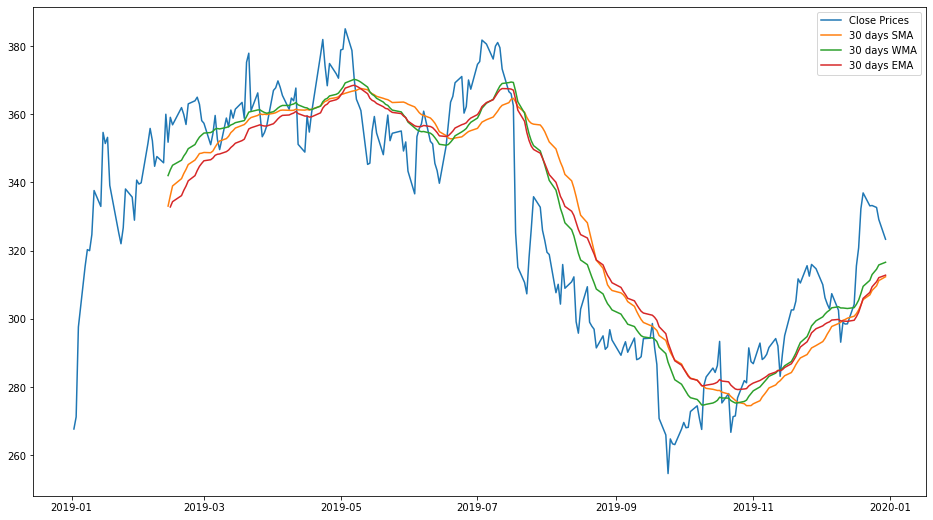

In [11]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(netflix_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(netflix_sma_30, label='30 days SMA')
ax.plot(netflix_wma_30, label='30 days WMA')
ax.plot(netflix_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [12]:
netflix_return_series = ((1 + netflix_adj_close.pct_change()).cumprod() - 1)
netflix_return_series

Date
2008-12-31          NaN
2009-01-02    -0.000669
2009-01-05     0.068585
2009-01-06     0.102041
2009-01-07     0.094346
                ...    
2019-12-23    77.009369
2019-12-24    77.032790
2019-12-26    76.899299
2019-12-27    76.070257
2019-12-30    74.716627
Name: Adj Close, Length: 2768, dtype: float64

In [13]:
netflix_annualized_return = ((1+netflix_return_series.tail(1))**(1/10))-1
netflix_annualized_return*100

Date
2019-12-30    54.141339
Name: Adj Close, dtype: float64

In [14]:
netflix_volatility = np.sqrt(np.log(netflix_close / netflix_close.shift(1)).var()) * np.sqrt(252)
netflix_volatility

0.5124949332666786

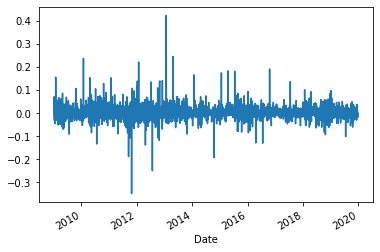

In [15]:
netflix_return_ts = netflix_adj_close.pct_change().dropna()
netflix_return_ts.plot()
plt.show()

In [16]:
# edit plotting.py to change show_perf_stats to return stats instead of just printing it

df = pf.show_perf_stats(netflix_return_ts)
df_dict = df.Backtest.to_dict()
df_dict

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-02
End date,2019-12-30
Total months,131
,Backtest
Annual return,48.3%
Cumulative returns,7471.7%
Annual volatility,51.5%
Sharpe ratio,1.02
Calmar ratio,0.59
Stability,0.91
Max drawdown,-82.0%


{'Annual return': '48.3%',
 'Cumulative returns': '7471.7%',
 'Annual volatility': '51.5%',
 'Sharpe ratio': 1.0208348704318866,
 'Calmar ratio': 0.5891061599595316,
 'Stability': 0.9080718371919333,
 'Max drawdown': '-82.0%',
 'Omega ratio': 1.2237265248552942,
 'Sortino ratio': 1.6147295577875422,
 'Skew': 0.9119962580649904,
 'Kurtosis': 22.676322274366573,
 'Tail ratio': 1.1417303813308863,
 'Daily value at risk': '-6.3%'}

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-02
End date,2019-12-30
Total months,131
,Backtest
Annual return,48.3%
Cumulative returns,7471.7%
Annual volatility,51.5%
Sharpe ratio,1.02
Calmar ratio,0.59
Stability,0.91
Max drawdown,-82.0%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


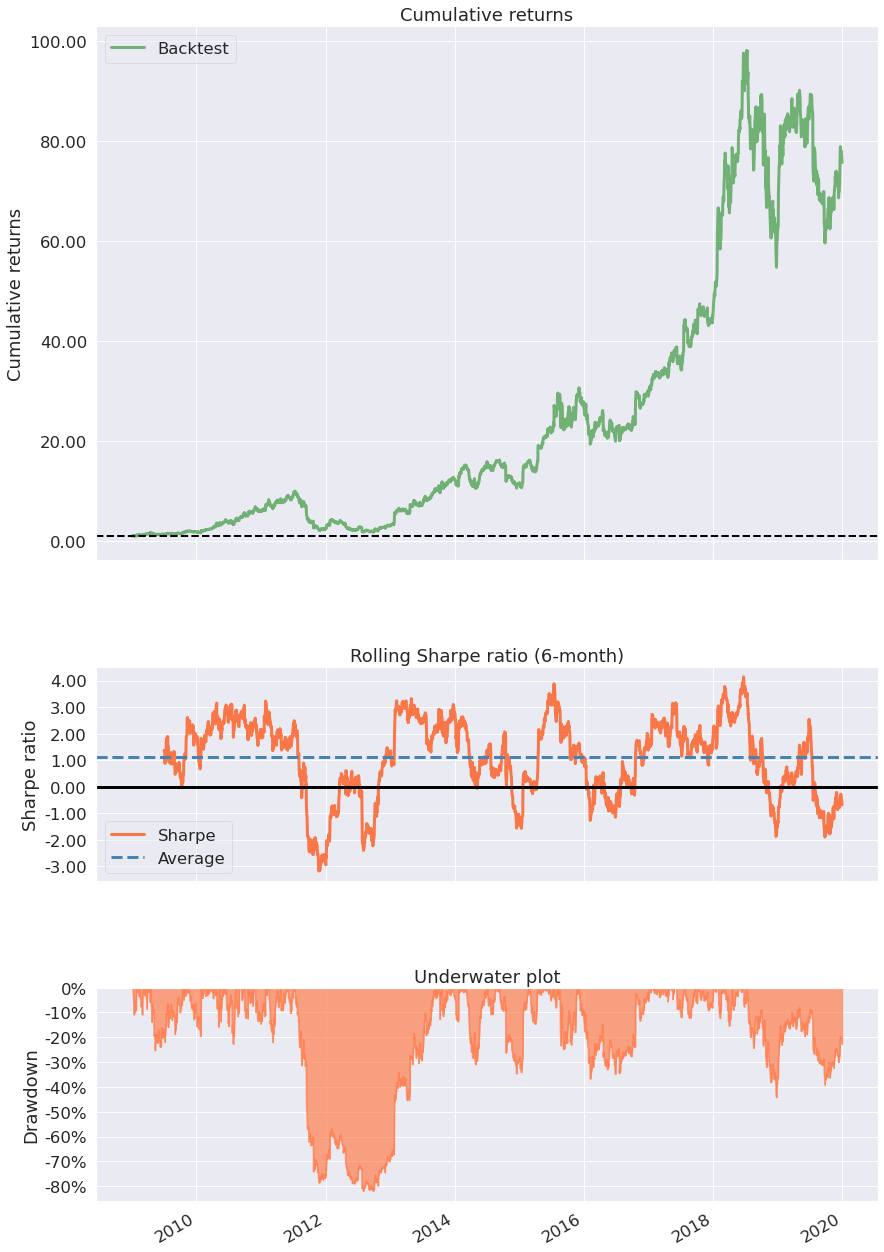

In [16]:
pf.create_simple_tear_sheet(netflix_return_ts)

## Salesforce

In [17]:
salesforce_data = pdr.get_data_yahoo("CRM", start="2009-01-01", end="2019-12-31")
salesforce_close = salesforce_data["Close"]
salesforce_adj_close = salesforce_data["Adj Close"]
salesforce_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2008-12-31    8.0025
2009-01-02    8.5050
2009-01-05    8.3375
2009-01-06    8.6500
2009-01-07    8.0000
Name: Close, dtype: float64

In [18]:
round((salesforce_close.tail(1).values / salesforce_close.head(1).values)[0], 3)

20.299

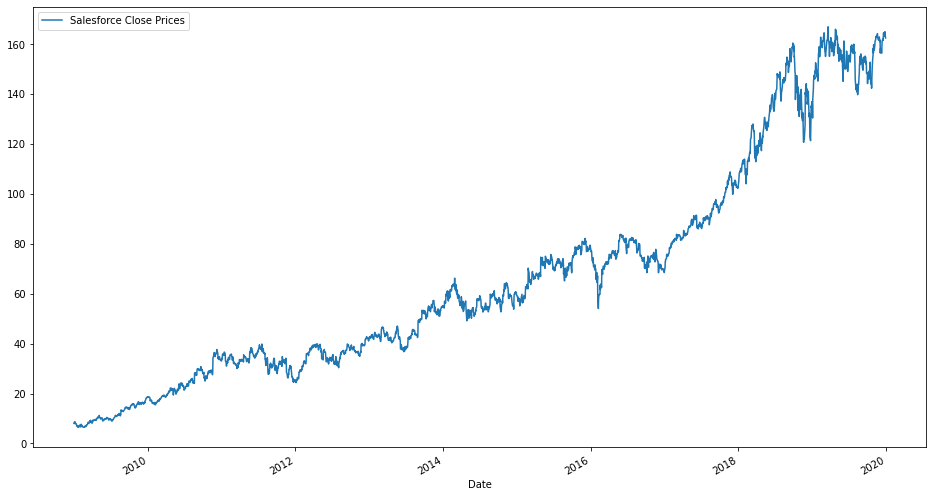

In [19]:
salesforce_close.plot(label="Salesforce Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [20]:
# pct change

salesforce_pct_change = salesforce_close.pct_change()
salesforce_pct_change.head()

Date
2008-12-31         NaN
2009-01-02    0.062793
2009-01-05   -0.019694
2009-01-06    0.037481
2009-01-07   -0.075144
Name: Close, dtype: float64

In [21]:
# which day had the worst single day returns

salesforce_pct_change.idxmin()

Timestamp('2016-02-05 00:00:00')

In [22]:
# which day had the best single day returns

salesforce_pct_change.idxmax()

Timestamp('2010-11-19 00:00:00')

In [23]:
# std to assess risk

salesforce_pct_change.std()

0.022597587383301886

In [24]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [25]:
salesforce_sma_30 = salesforce_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
salesforce_wma_30 = salesforce_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
salesforce_ema_30 = salesforce_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

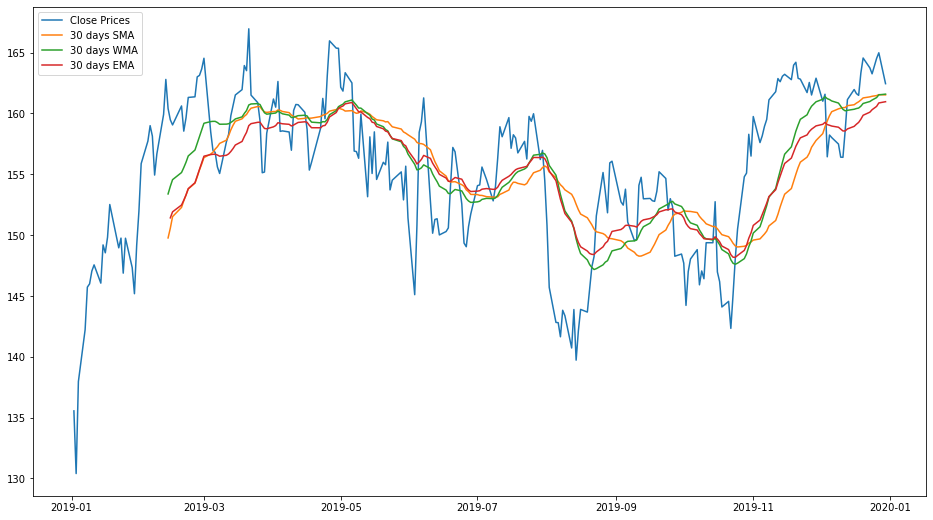

In [26]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(salesforce_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(salesforce_sma_30, label='30 days SMA')
ax.plot(salesforce_wma_30, label='30 days WMA')
ax.plot(salesforce_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [27]:
salesforce_return_series = ((1 + salesforce_adj_close.pct_change()).cumprod() - 1)
salesforce_return_series

Date
2008-12-31          NaN
2009-01-02     0.062793
2009-01-05     0.041862
2009-01-06     0.080912
2009-01-07    -0.000312
                ...    
2019-12-23    19.461108
2019-12-24    19.399876
2019-12-26    19.557326
2019-12-27    19.616058
2019-12-30    19.298658
Name: Adj Close, Length: 2768, dtype: float64

In [28]:
salesforce_annualized_return = ((1+salesforce_return_series.tail(1))**(1/10))-1
salesforce_annualized_return*100

Date
2019-12-30    35.128431
Name: Adj Close, dtype: float64

In [29]:
salesforce_volatility = np.sqrt(np.log(salesforce_close / salesforce_close.shift(1)).var()) * np.sqrt(252)
salesforce_volatility

0.35646187941696966

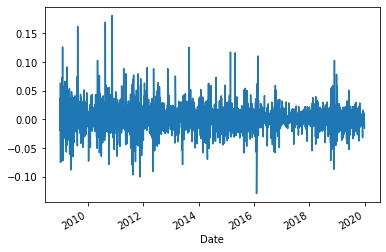

In [30]:
salesforce_return_ts = salesforce_adj_close.pct_change().dropna()
salesforce_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-02
End date,2019-12-30
Total months,131
,Backtest
Annual return,31.5%
Cumulative returns,1929.9%
Annual volatility,35.9%
Sharpe ratio,0.94
Calmar ratio,0.81
Stability,0.93
Max drawdown,-38.8%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


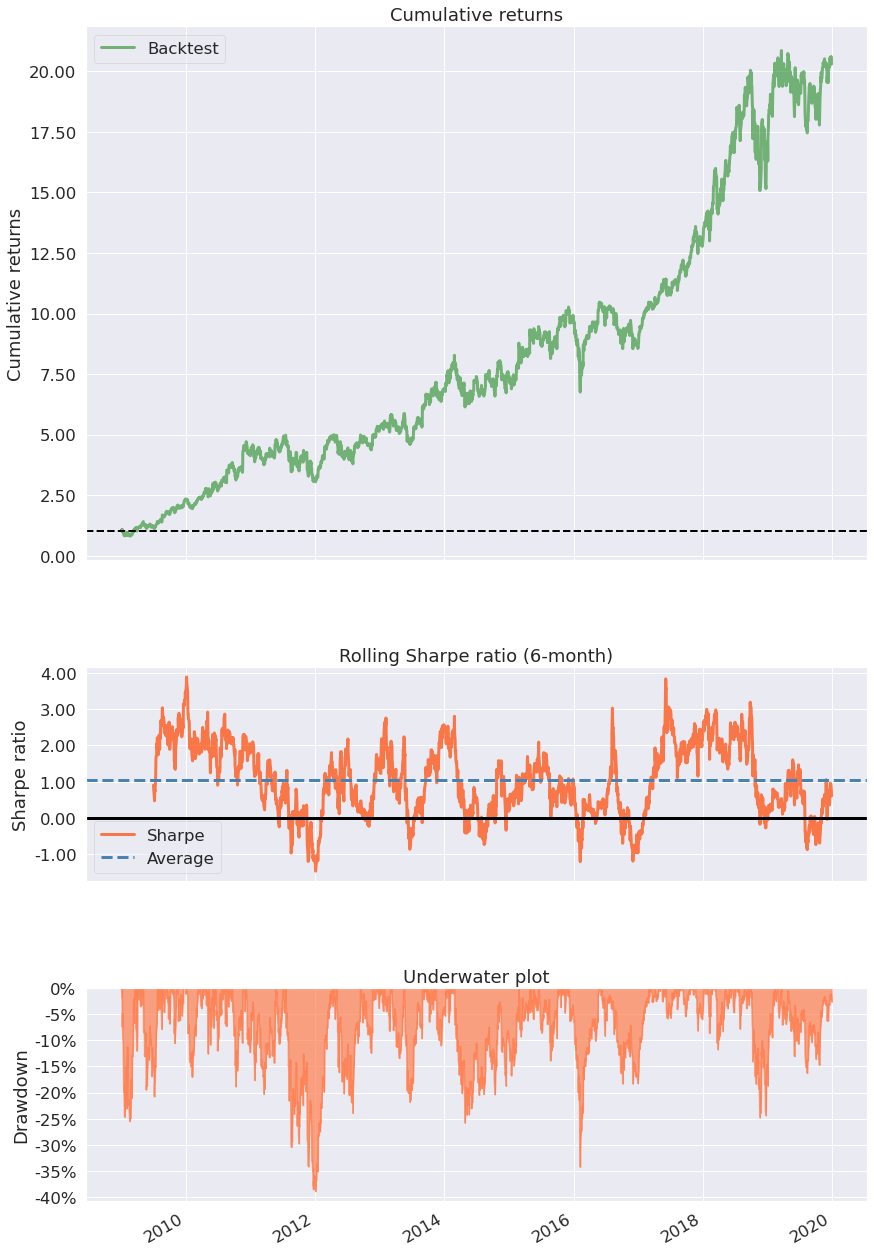

In [31]:
pf.create_simple_tear_sheet(salesforce_return_ts)

# SG Stocks

## DBS

In [2]:
dbs_data = pdr.get_data_yahoo("D05.SI", start="2009-01-01", end="2019-12-31")
dbs_close = dbs_data["Close"]
dbs_adj_close = dbs_data["Adj Close"]
dbs_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    8.69
2009-01-05    9.42
2009-01-06    9.56
2009-01-07    9.46
2009-01-08    8.99
Name: Close, dtype: float64

In [3]:
# check if 10x

round((dbs_close.tail(1).values / dbs_close.head(1).values)[0], 3)

2.972

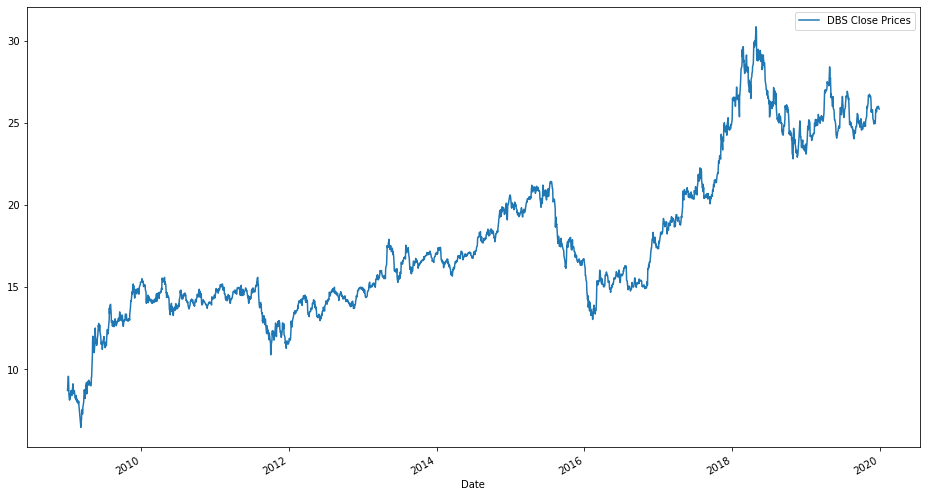

In [34]:
dbs_close.plot(label="DBS Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [35]:
# pct change

dbs_pct_change = dbs_close.pct_change()
dbs_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.084005
2009-01-06    0.014862
2009-01-07   -0.010460
2009-01-08   -0.049683
Name: Close, dtype: float64

In [36]:
# which day had the worst single day returns

dbs_pct_change.idxmin()

Timestamp('2009-03-09 00:00:00')

In [37]:
# which day had the best single day returns

dbs_pct_change.idxmax()

Timestamp('2009-05-04 00:00:00')

In [38]:
# std to assess risk

dbs_pct_change.std()

0.012825750217097412

In [39]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [40]:
dbs_sma_30 = dbs_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
dbs_wma_30 = dbs_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
dbs_ema_30 = dbs_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

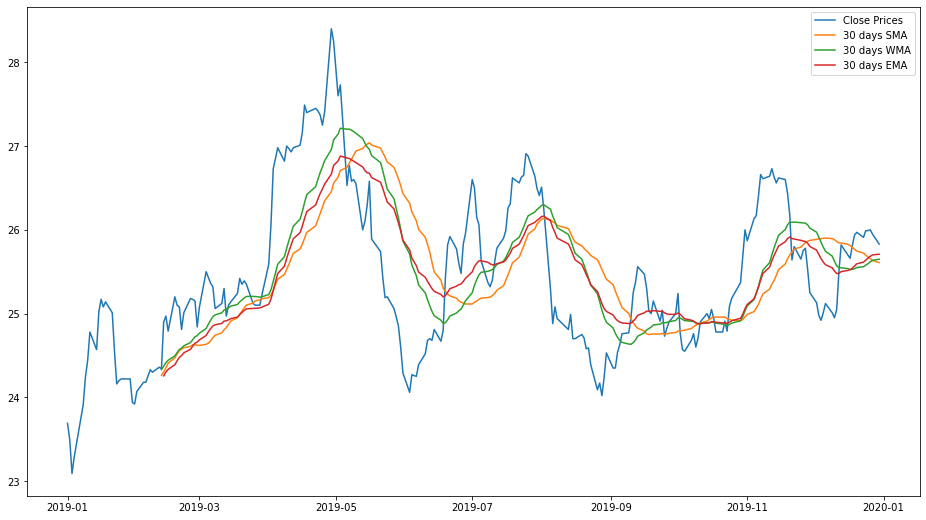

In [41]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(dbs_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(dbs_sma_30, label='30 days SMA')
ax.plot(dbs_wma_30, label='30 days WMA')
ax.plot(dbs_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [42]:
dbs_return_series = ((1 + dbs_adj_close.pct_change()).cumprod() - 1)
dbs_return_series

Date
2009-01-02         NaN
2009-01-05    0.084005
2009-01-06    0.100115
2009-01-07    0.088607
2009-01-08    0.034523
                ...   
2019-12-24    3.476412
2019-12-25    3.476412
2019-12-26    3.478135
2019-12-27    3.469523
2019-12-30    3.448855
Name: Adj Close, Length: 2760, dtype: float64

In [43]:
dbs_annualized_return = ((1+dbs_return_series.tail(1))**(1/10))-1
dbs_annualized_return*100

Date
2019-12-30    16.098022
Name: Adj Close, dtype: float64

In [44]:
dbs_volatility = np.sqrt(np.log(dbs_close / dbs_close.shift(1)).var()) * np.sqrt(252)
dbs_volatility

0.2030484188475756

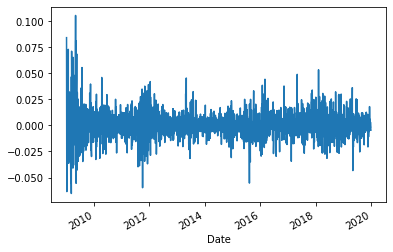

In [45]:
dbs_return_ts = dbs_adj_close.pct_change().dropna()
dbs_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,14.6%
Cumulative returns,344.9%
Annual volatility,20.1%
Sharpe ratio,0.78
Calmar ratio,0.38
Stability,0.87
Max drawdown,-38.4%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


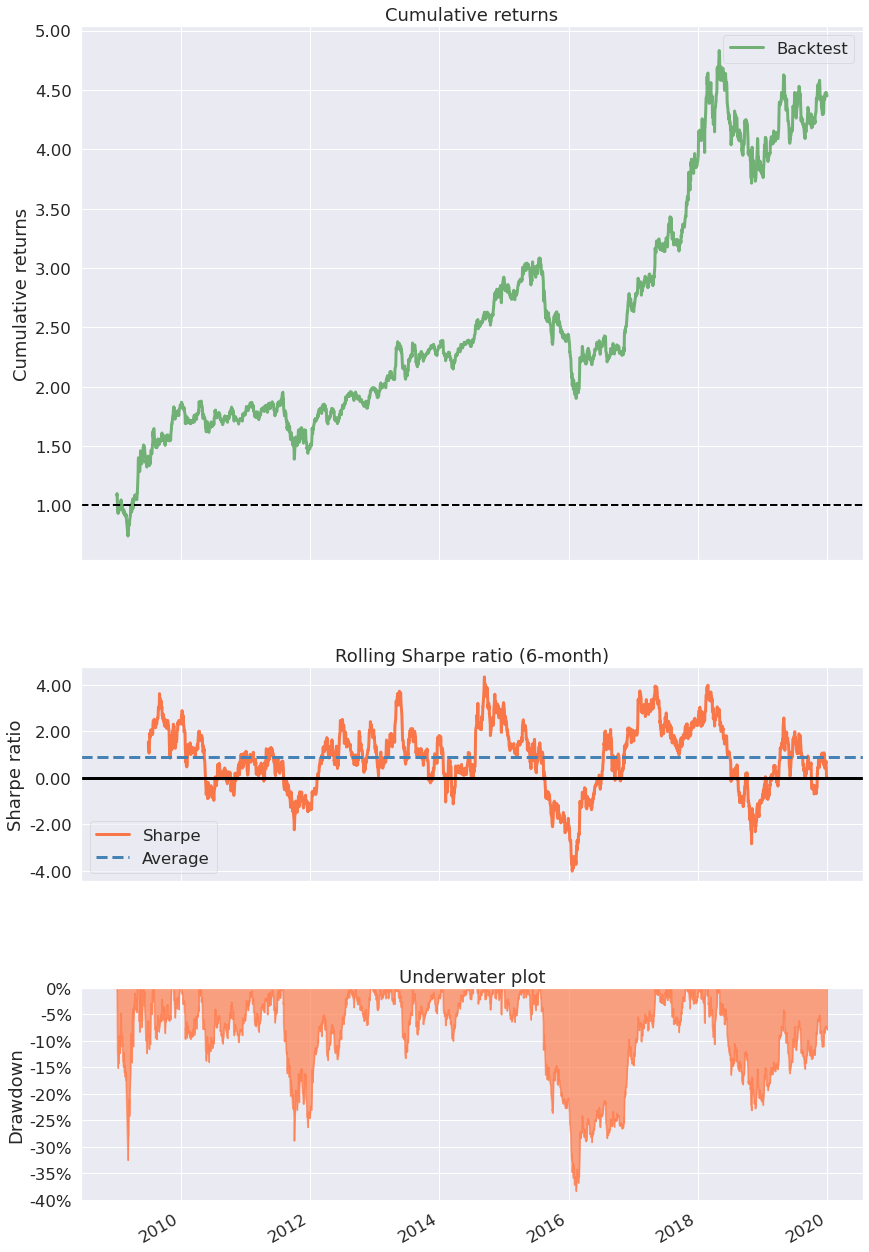

In [46]:
pf.create_simple_tear_sheet(dbs_return_ts)

## Jardine Matheson Holdings Limited 

In [47]:
JMHL_data = pdr.get_data_yahoo("J36.SI", start="2009-01-01", end="2019-12-31")
JMHL_close = JMHL_data["Close"]
JMHL_adj_close = JMHL_data["Adj Close"]
JMHL_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    18.340000
2009-01-05    19.480000
2009-01-06    20.139999
2009-01-07    20.780001
2009-01-08    20.000000
Name: Close, dtype: float64

In [48]:
# check if 10x

round((JMHL_close.tail(1).values / JMHL_close.head(1).values)[0], 3)

3.043

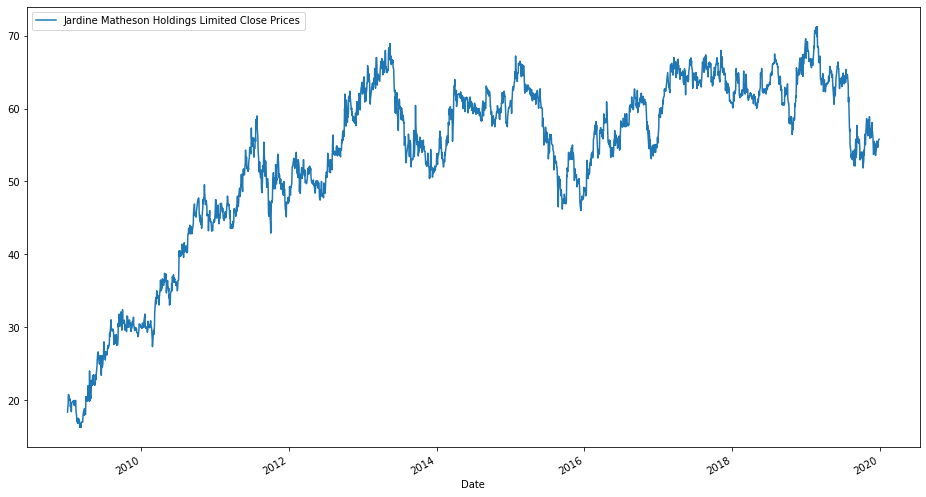

In [49]:
JMHL_close.plot(label="Jardine Matheson Holdings Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [50]:
# pct change

JMHL_pct_change = JMHL_close.pct_change()
JMHL_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.062159
2009-01-06    0.033881
2009-01-07    0.031778
2009-01-08   -0.037536
Name: Close, dtype: float64

In [51]:
# which day had the worst single day returns

JMHL_pct_change.idxmin()

Timestamp('2009-04-22 00:00:00')

In [52]:
# which day had the best single day returns

JMHL_pct_change.idxmax()

Timestamp('2009-04-21 00:00:00')

In [53]:
# std to assess risk

JMHL_pct_change.std()

0.017643280620419987

In [54]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [55]:
JMHL_sma_30 = JMHL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
JMHL_wma_30 = JMHL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
JMHL_ema_30 = JMHL_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

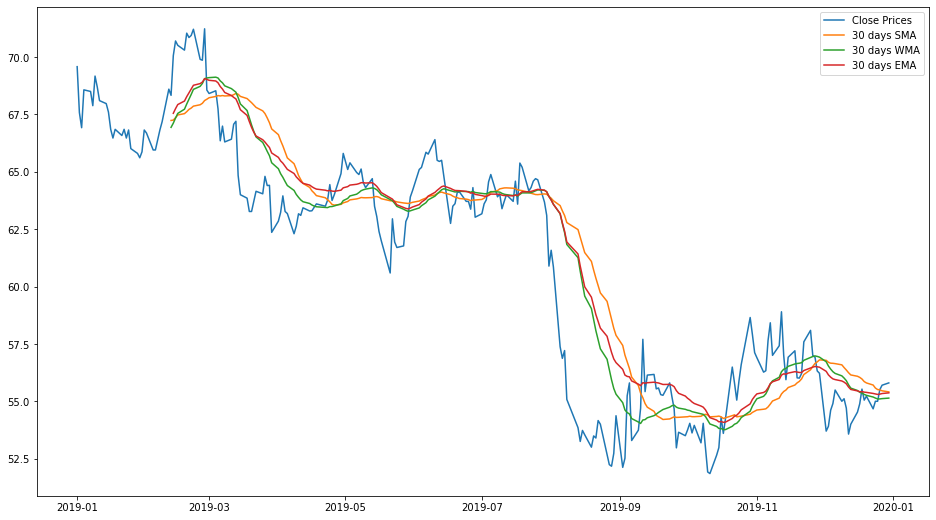

In [56]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(JMHL_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(JMHL_sma_30, label='30 days SMA')
ax.plot(JMHL_wma_30, label='30 days WMA')
ax.plot(JMHL_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [57]:
JMHL_return_series = ((1 + JMHL_adj_close.pct_change()).cumprod() - 1)
JMHL_return_series

Date
2009-01-02         NaN
2009-01-05    0.062159
2009-01-06    0.098146
2009-01-07    0.133043
2009-01-08    0.090513
                ...   
2019-12-24    3.171487
2019-12-25    3.171487
2019-12-26    3.210168
2019-12-27    3.224579
2019-12-30    3.232163
Name: Adj Close, Length: 2760, dtype: float64

In [58]:
JMHL_annualized_return = ((1+JMHL_return_series.tail(1))**(1/10))-1
JMHL_annualized_return*100

Date
2019-12-30    15.519749
Name: Adj Close, dtype: float64

In [59]:
JMHL_volatility = np.sqrt(np.log(JMHL_close / JMHL_close.shift(1)).var()) * np.sqrt(252)
JMHL_volatility

0.27923925092927904

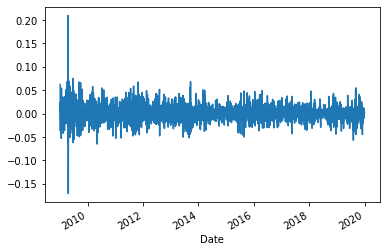

In [60]:
JMHL_return_ts =JMHL_adj_close.pct_change().dropna()
JMHL_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,14.1%
Cumulative returns,323.2%
Annual volatility,28.0%
Sharpe ratio,0.61
Calmar ratio,0.47
Stability,0.71
Max drawdown,-29.8%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


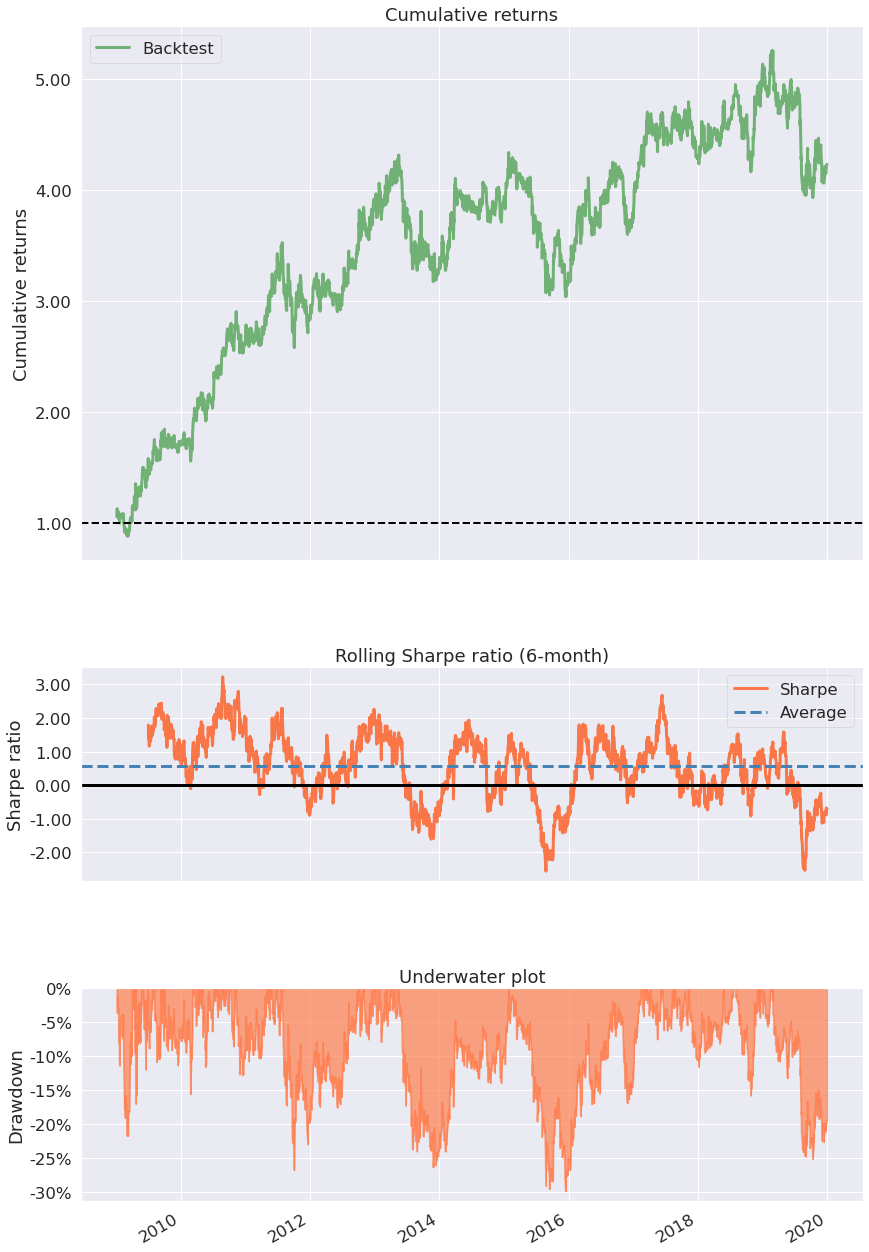

In [61]:
pf.create_simple_tear_sheet(JMHL_return_ts)

## Jardine Cycle & Carriage Limited

In [62]:
JCCL_data = pdr.get_data_yahoo("C07.SI", start="2009-01-01", end="2019-12-31")
JCCL_close = JCCL_data["Close"]
JCCL_adj_close = JCCL_data["Adj Close"]
JCCL_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02     9.648444
2009-01-05    10.407092
2009-01-06    10.270924
2009-01-07    10.426544
2009-01-08    10.056947
Name: Close, dtype: float64

In [63]:
# check if 10x

round((JCCL_close.tail(1).values / JCCL_close.head(1).values)[0], 3)

3.135

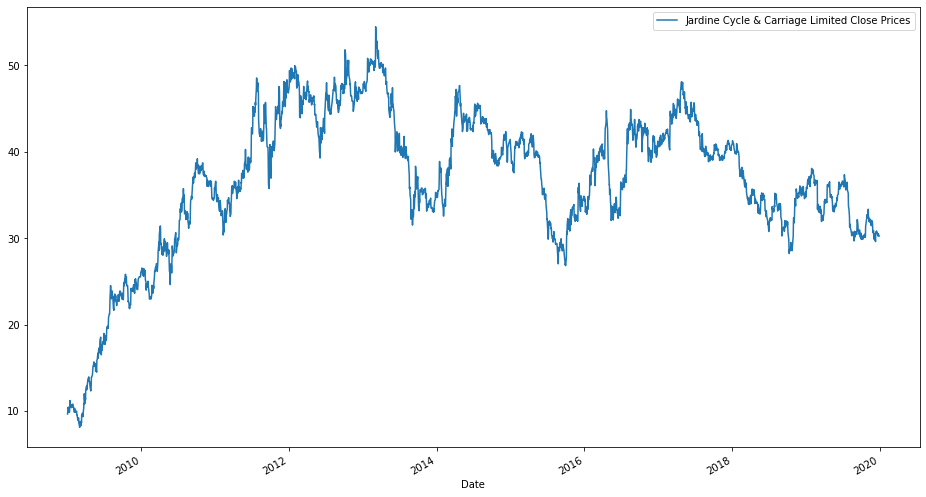

In [64]:
JCCL_close.plot(label="Jardine Cycle & Carriage Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [65]:
# pct change

JCCL_pct_change = JCCL_close.pct_change()
JCCL_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.078629
2009-01-06   -0.013084
2009-01-07    0.015152
2009-01-08   -0.035448
Name: Close, dtype: float64

In [66]:
# which day had the worst single day returns

JCCL_pct_change.idxmin()

Timestamp('2019-02-28 00:00:00')

In [67]:
# which day had the best single day returns

JCCL_pct_change.idxmax()

Timestamp('2009-03-26 00:00:00')

In [68]:
# std to assess risk

JCCL_pct_change.std()

0.018708617383999916

In [69]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [70]:
JCCL_sma_30 = JCCL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
JCCL_wma_30 = JCCL_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
JCCL_ema_30 = JCCL_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

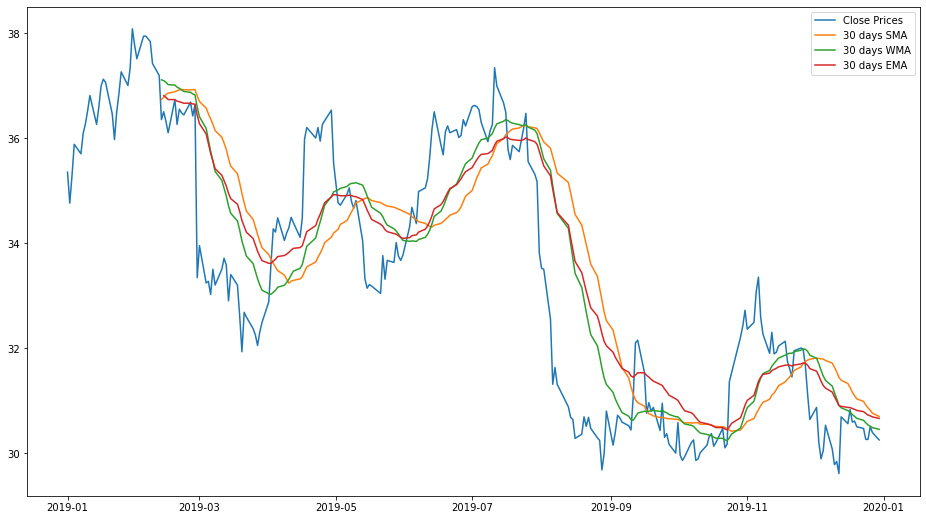

In [71]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(JCCL_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(JCCL_sma_30, label='30 days SMA')
ax.plot(JCCL_wma_30, label='30 days WMA')
ax.plot(JCCL_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [72]:
JCCL_return_series = ((1 + JCCL_adj_close.pct_change()).cumprod() - 1)
JCCL_return_series

Date
2009-01-02         NaN
2009-01-05    0.078629
2009-01-06    0.064516
2009-01-07    0.080645
2009-01-08    0.042339
                ...   
2019-12-24    3.183560
2019-12-25    3.183560
2019-12-26    3.216741
2019-12-27    3.201533
2019-12-30    3.182178
Name: Adj Close, Length: 2760, dtype: float64

In [73]:
JCCL_annualized_return = ((1+JCCL_return_series.tail(1))**(1/10))-1
JCCL_annualized_return*100

Date
2019-12-30    15.382581
Name: Adj Close, dtype: float64

In [74]:
JCCL_volatility = np.sqrt(np.log(JCCL_close / JCCL_close.shift(1)).var()) * np.sqrt(252)
JCCL_volatility

0.2953291766715619

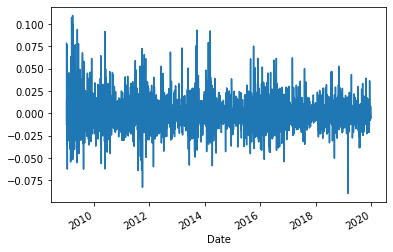

In [75]:
JCCL_return_ts =JCCL_adj_close.pct_change().dropna()
JCCL_return_ts.plot()
plt.show()

c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,14.0%
Cumulative returns,318.2%
Annual volatility,29.7%
Sharpe ratio,0.59
Calmar ratio,0.30
Stability,0.30
Max drawdown,-47.0%


c:\ProgramData\Anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


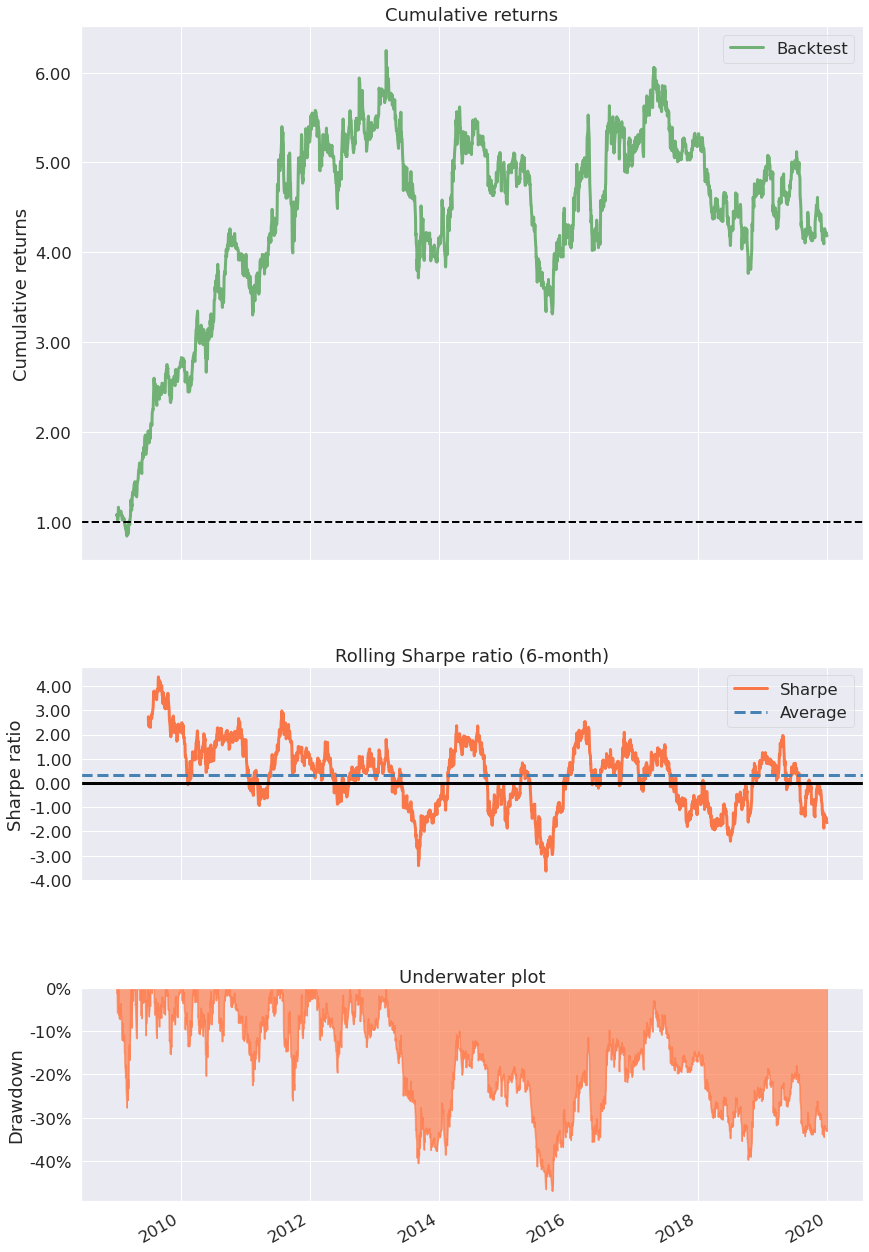

In [76]:
pf.create_simple_tear_sheet(JCCL_return_ts)

## Q & M Dental Group (Singapore) Limited

In [8]:
QC7_data = pdr.get_data_yahoo("QC7.SI", start="2009-01-01", end="2019-12-31")
QC7_close =QC7_data["Close"]
QC7_adj_close = QC7_data["Adj Close"]
QC7_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-11-26    0.114130
2009-11-30    0.108695
2009-12-01    0.115942
2009-12-02    0.110507
2009-12-03    0.108695
Name: Close, dtype: float64

In [9]:
# check if 10x

round((QC7_close.tail(1).values / QC7_close.head(1).values)[0], 3)

3.541

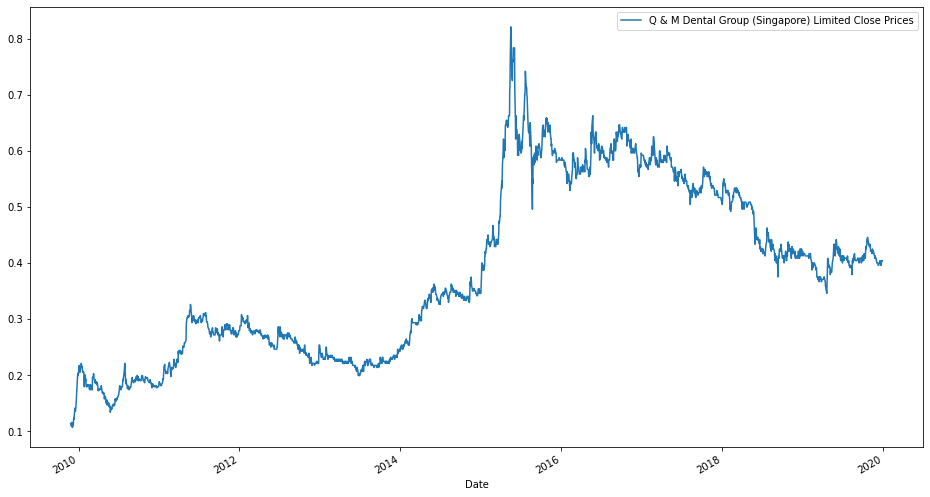

In [10]:
QC7_close.plot(label="Q & M Dental Group (Singapore) Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [11]:
# pct change

QC7_pct_change = QC7_close.pct_change()
QC7_pct_change.head()

Date
2009-11-26         NaN
2009-11-30   -0.047621
2009-12-01    0.066673
2009-12-02   -0.046877
2009-12-03   -0.016397
Name: Close, dtype: float64

In [12]:
# which day had the worst single day returns

QC7_pct_change.idxmin()

Timestamp('2010-08-02 00:00:00')

In [13]:
# which day had the best single day returns

QC7_pct_change.idxmax()

Timestamp('2009-12-28 00:00:00')

In [14]:
# std to assess risk

QC7_pct_change.std()

0.019473990299936506

In [15]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [18]:
QC7_sma_30 = QC7_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
QC7_wma_30 = QC7_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
QC7_ema_30 = QC7_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

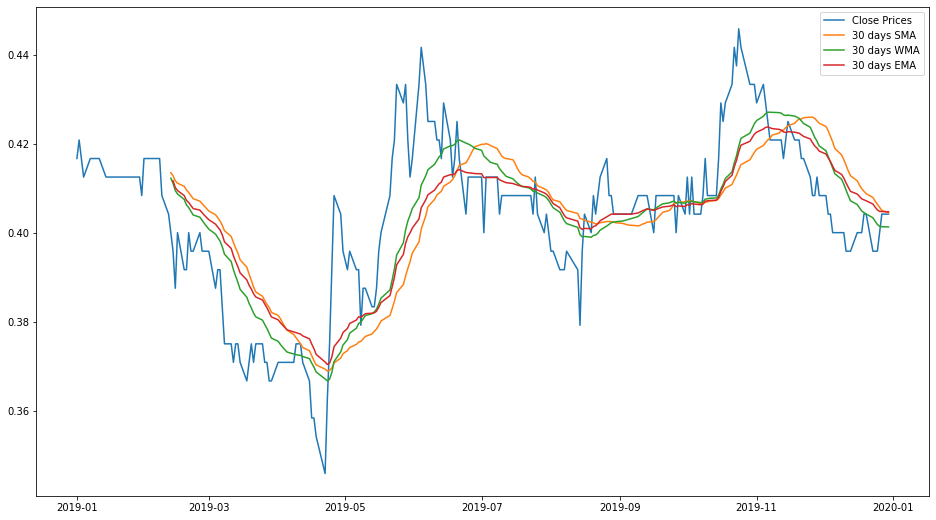

In [19]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(QC7_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(QC7_sma_30, label='30 days SMA')
ax.plot(QC7_wma_30, label='30 days WMA')
ax.plot(QC7_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [20]:
QC7_return_series = ((1 + QC7_adj_close.pct_change()).cumprod() - 1)
QC7_return_series

Date
2009-11-26         NaN
2009-11-30   -0.047621
2009-12-01    0.015877
2009-12-02   -0.031745
2009-12-03   -0.047621
                ...   
2019-12-24    3.206535
2019-12-25    3.206535
2019-12-26    3.250818
2019-12-27    3.295091
2019-12-30    3.295091
Name: Adj Close, Length: 2531, dtype: float64

In [21]:
QC7_annualized_return = ((1+QC7_return_series.tail(1))**(1/10))-1
QC7_annualized_return*100

Date
2019-12-30    15.690376
Name: Adj Close, dtype: float64

In [22]:
QC7_volatility = np.sqrt(np.log(QC7_close / QC7_close.shift(1)).var()) * np.sqrt(252)
QC7_volatility

0.30569510002165423

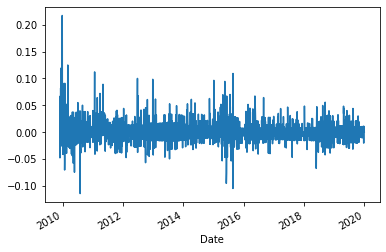

In [24]:
QC7_return_ts =QC7_adj_close.pct_change().dropna()
QC7_return_ts.plot()
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-11-30
End date,2019-12-30
Total months,120
,Backtest
Annual return,15.6%
Cumulative returns,329.5%
Annual volatility,30.9%
Sharpe ratio,0.62
Calmar ratio,0.28
Stability,0.67
Max drawdown,-55.5%


C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


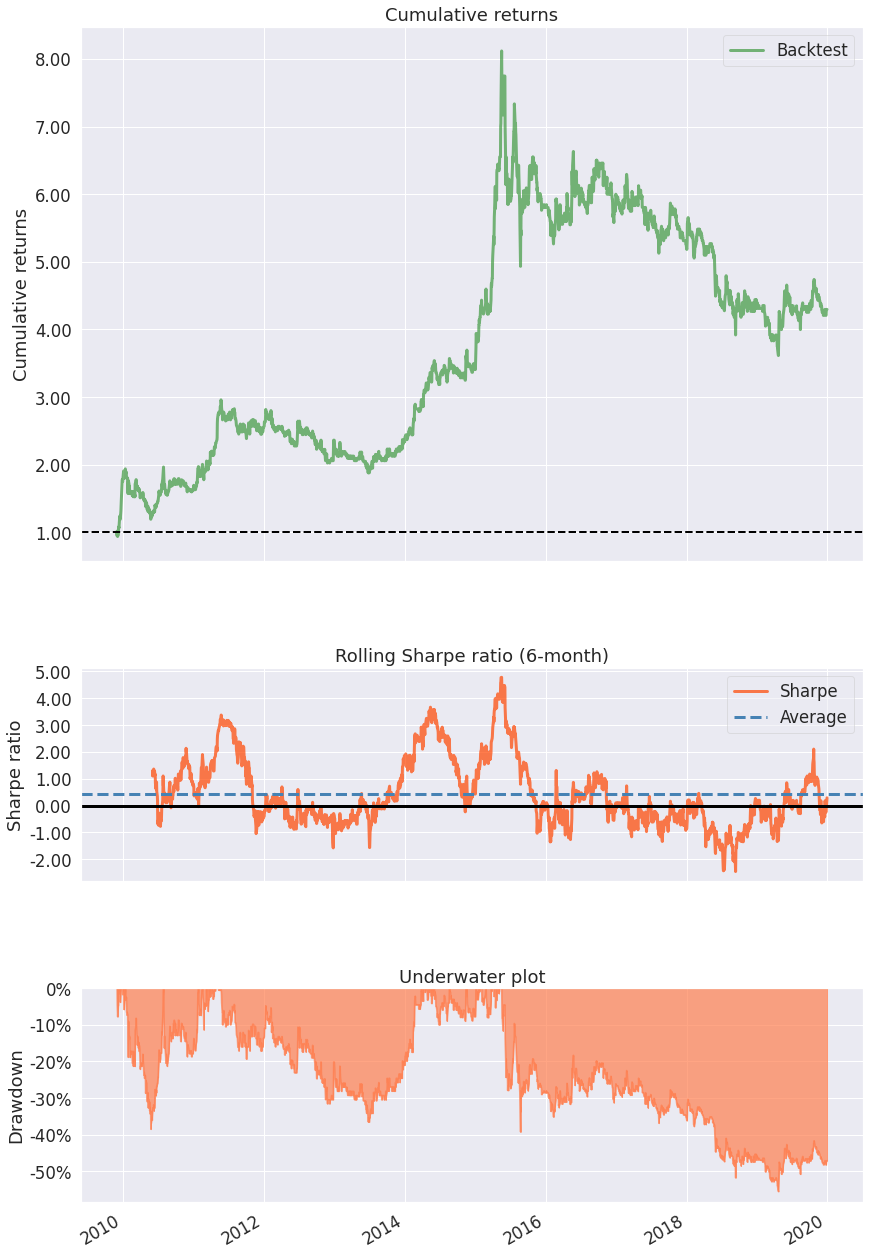

In [25]:
pf.create_simple_tear_sheet(QC7_return_ts)

## AEM Holdings Ltd.

In [30]:
AWX_data = pdr.get_data_yahoo("AWX.SI", start="2009-01-01", end="2019-12-31")
AWX_close =AWX_data["Close"]
AWX_adj_close = AWX_data["Adj Close"]
AWX_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    0.025000
2009-01-05    0.025000
2009-01-06    0.025000
2009-01-07    0.033333
2009-01-08    0.033333
Name: Close, dtype: float64

In [31]:
# check if 10x

round((AWX_close.tail(1).values / AWX_close.head(1).values)[0], 3)

79.6

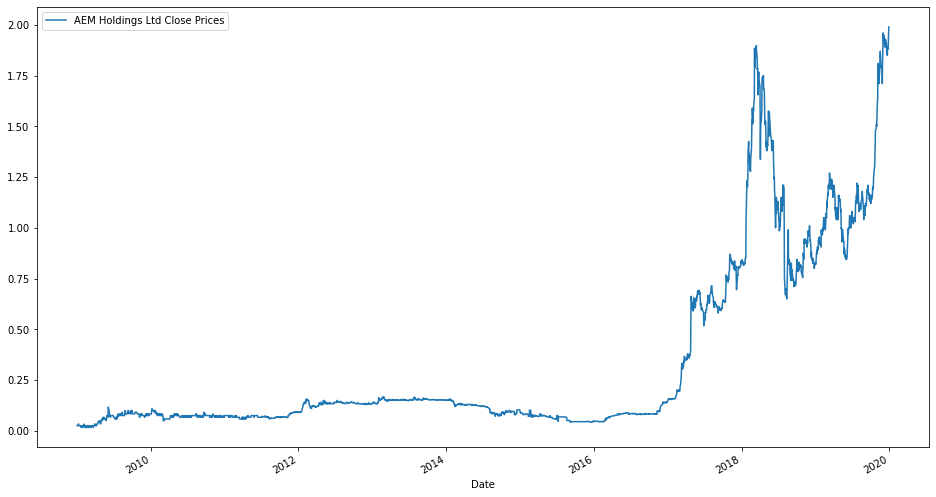

In [32]:
AWX_close.plot(label="AEM Holdings Ltd Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [35]:
# pct change

AWX_pct_change = AWX_close.pct_change()
AWX_pct_change.head()

Date
2009-01-02        NaN
2009-01-05    0.00000
2009-01-06    0.00000
2009-01-07    0.33332
2009-01-08    0.00000
Name: Close, dtype: float64

In [36]:
# which day had the worst single day returns

AWX_pct_change.idxmin()

Timestamp('2009-01-21 00:00:00')

In [37]:
# which day had the best single day returns

AWX_pct_change.idxmax()

Timestamp('2009-06-05 00:00:00')

In [38]:
# std to assess risk

AWX_pct_change.std()

0.06222293471094676

In [15]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [39]:
AWX_sma_30 = AWX_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
AWX_wma_30 = AWX_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
AWX_ema_30 = AWX_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

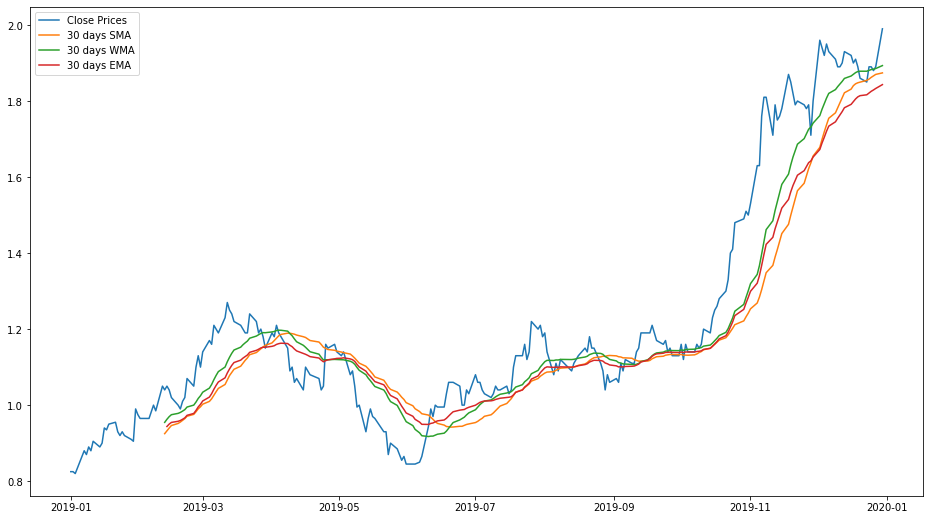

In [40]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(AWX_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(AWX_sma_30, label='30 days SMA')
ax.plot(AWX_wma_30, label='30 days WMA')
ax.plot(AWX_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [41]:
AWX_return_series = ((1 + AWX_adj_close.pct_change()).cumprod() - 1)
AWX_return_series

Date
2009-01-02          NaN
2009-01-05     0.000000
2009-01-06     0.000000
2009-01-07     0.333320
2009-01-08     0.333320
                ...    
2019-12-24    94.879984
2019-12-25    94.879984
2019-12-26    94.372691
2019-12-27    94.879984
2019-12-30    99.952995
Name: Adj Close, Length: 2760, dtype: float64

In [42]:
AWX_annualized_return = ((1+AWX_return_series.tail(1))**(1/10))-1
AWX_annualized_return*100

Date
2019-12-30    58.639715
Name: Adj Close, dtype: float64

In [43]:
AWX_volatility = np.sqrt(np.log(AWX_close / AWX_close.shift(1)).var()) * np.sqrt(252)
AWX_volatility

0.9550910984836882

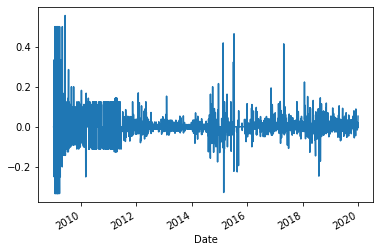

In [44]:
AWX_return_ts =AWX_adj_close.pct_change().dropna()
AWX_return_ts.plot()
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,52.4%
Cumulative returns,9995.3%
Annual volatility,98.8%
Sharpe ratio,0.90
Calmar ratio,0.70
Stability,0.62
Max drawdown,-74.7%


C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


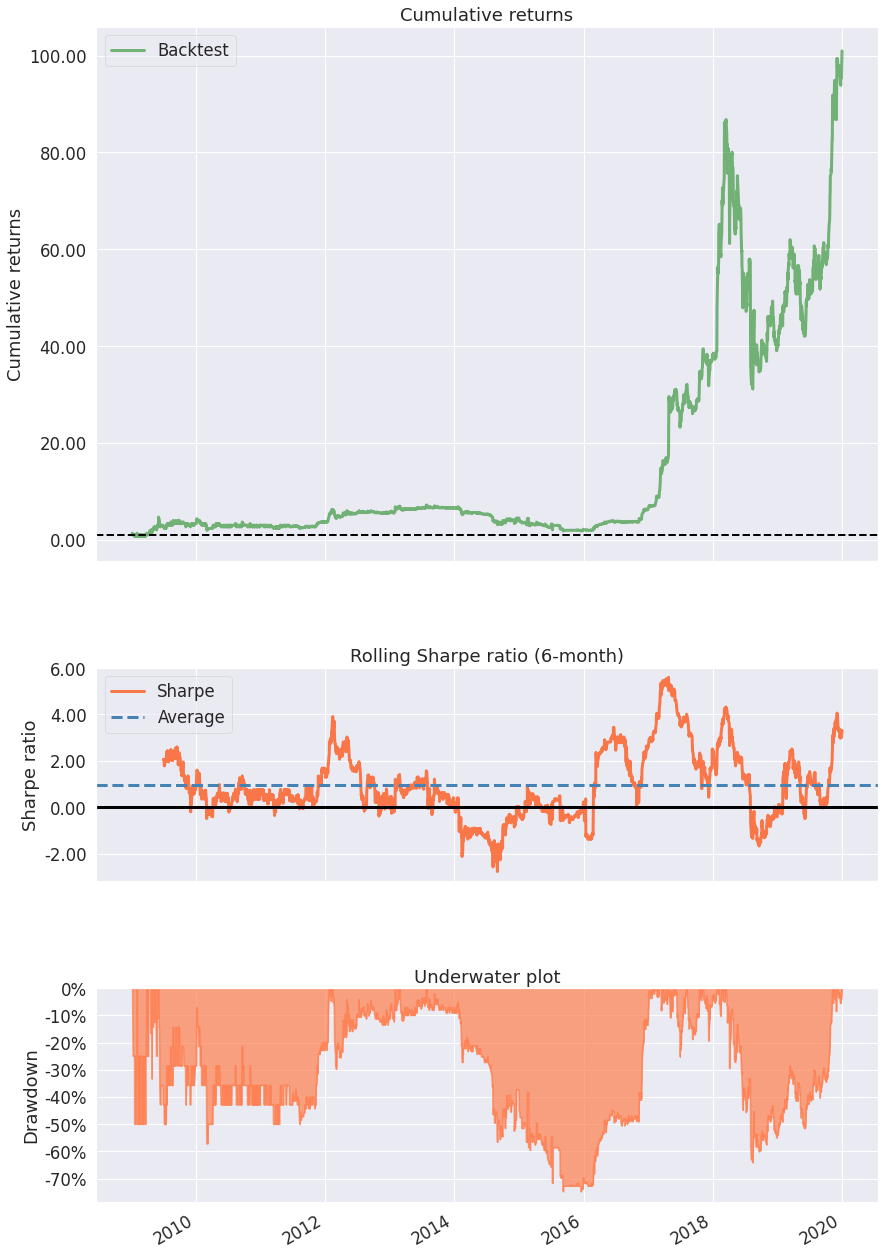

In [45]:
pf.create_simple_tear_sheet(AWX_return_ts)

## 	Challenger Technologies

In [57]:
Challenger_data = pdr.get_data_yahoo("573.SI", start="2009-01-01", end="2019-12-31")
Challenger_close =Challenger_data["Close"]
Challenger_adj_close = Challenger_data["Adj Close"]
Challenger_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    0.120000
2009-01-05    0.120000
2009-01-06    0.113333
2009-01-07    0.120000
2009-01-08    0.116666
Name: Close, dtype: float64

In [58]:
# check if 10x

round((Challenger_close.tail(1).values / Challenger_close.head(1).values)[0], 3)

4.417

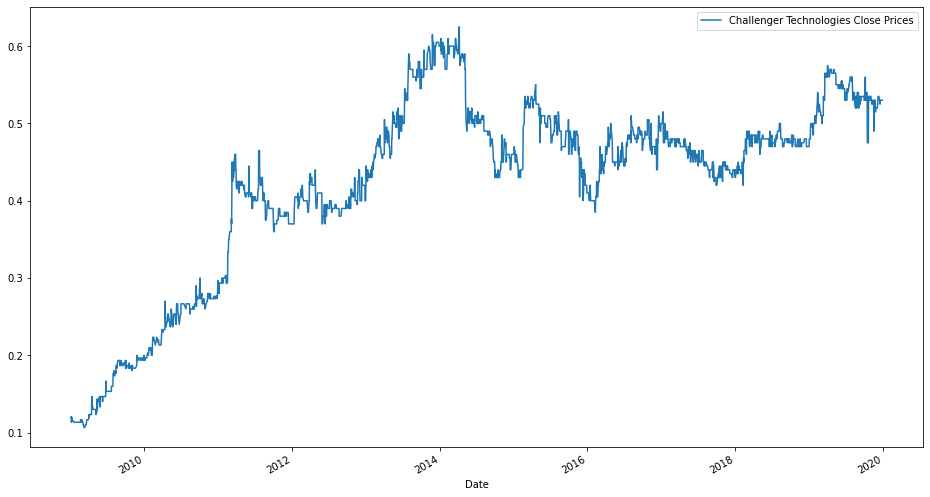

In [59]:
Challenger_close.plot(label="Challenger Technologies Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [60]:
# pct change

Challenger_pct_change = Challenger_close.pct_change()
Challenger_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.000000
2009-01-06   -0.055558
2009-01-07    0.058827
2009-01-08   -0.027783
Name: Close, dtype: float64

In [61]:
# which day had the worst single day returns

Challenger_pct_change.idxmin()

Timestamp('2019-10-17 00:00:00')

In [62]:
# which day had the best single day returns

Challenger_pct_change.idxmax()

Timestamp('2010-04-14 00:00:00')

In [63]:
# std to assess risk

Challenger_pct_change.std()

0.02036006680139147

In [15]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [64]:
Challenger_sma_30 = Challenger_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
Challenger_wma_30 = Challenger_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
Challenger_ema_30 = Challenger_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

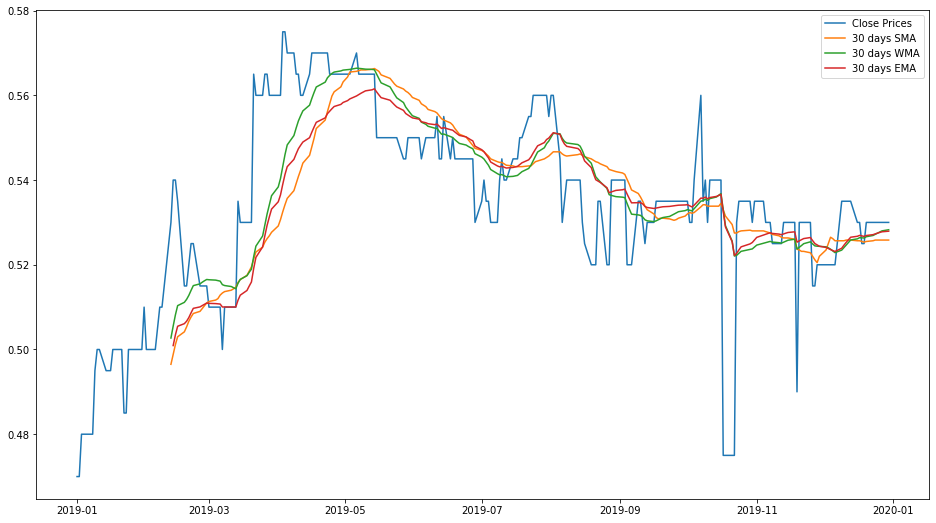

In [65]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(Challenger_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(Challenger_sma_30, label='30 days SMA')
ax.plot(Challenger_wma_30, label='30 days WMA')
ax.plot(Challenger_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [66]:
Challenger_return_series = ((1 + Challenger_adj_close.pct_change()).cumprod() - 1)
Challenger_return_series

Date
2009-01-02             NaN
2009-01-05    0.000000e+00
2009-01-06   -5.555843e-02
2009-01-07   -1.110223e-16
2009-01-08   -2.778337e-02
                  ...     
2019-12-24    7.373328e+00
2019-12-25    7.373328e+00
2019-12-26    7.373328e+00
2019-12-27    7.373328e+00
2019-12-30    7.373328e+00
Name: Adj Close, Length: 2634, dtype: float64

In [67]:
Challenger_annualized_return = ((1+Challenger_return_series.tail(1))**(1/10))-1
Challenger_annualized_return*100

Date
2019-12-30    23.677248
Name: Adj Close, dtype: float64

In [68]:
Challenger_volatility = np.sqrt(np.log(Challenger_close / Challenger_close.shift(1)).var()) * np.sqrt(252)
Challenger_volatility

0.3207603734252384

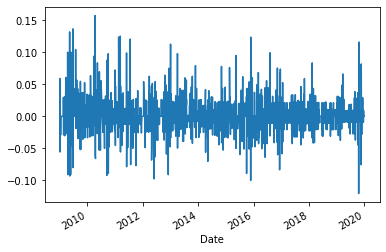

In [69]:
Challenger_return_ts =Challenger_adj_close.pct_change().dropna()
Challenger_return_ts.plot()
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,125
,Backtest
Annual return,22.6%
Cumulative returns,737.3%
Annual volatility,32.4%
Sharpe ratio,0.79
Calmar ratio,0.70
Stability,0.70
Max drawdown,-32.3%


C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


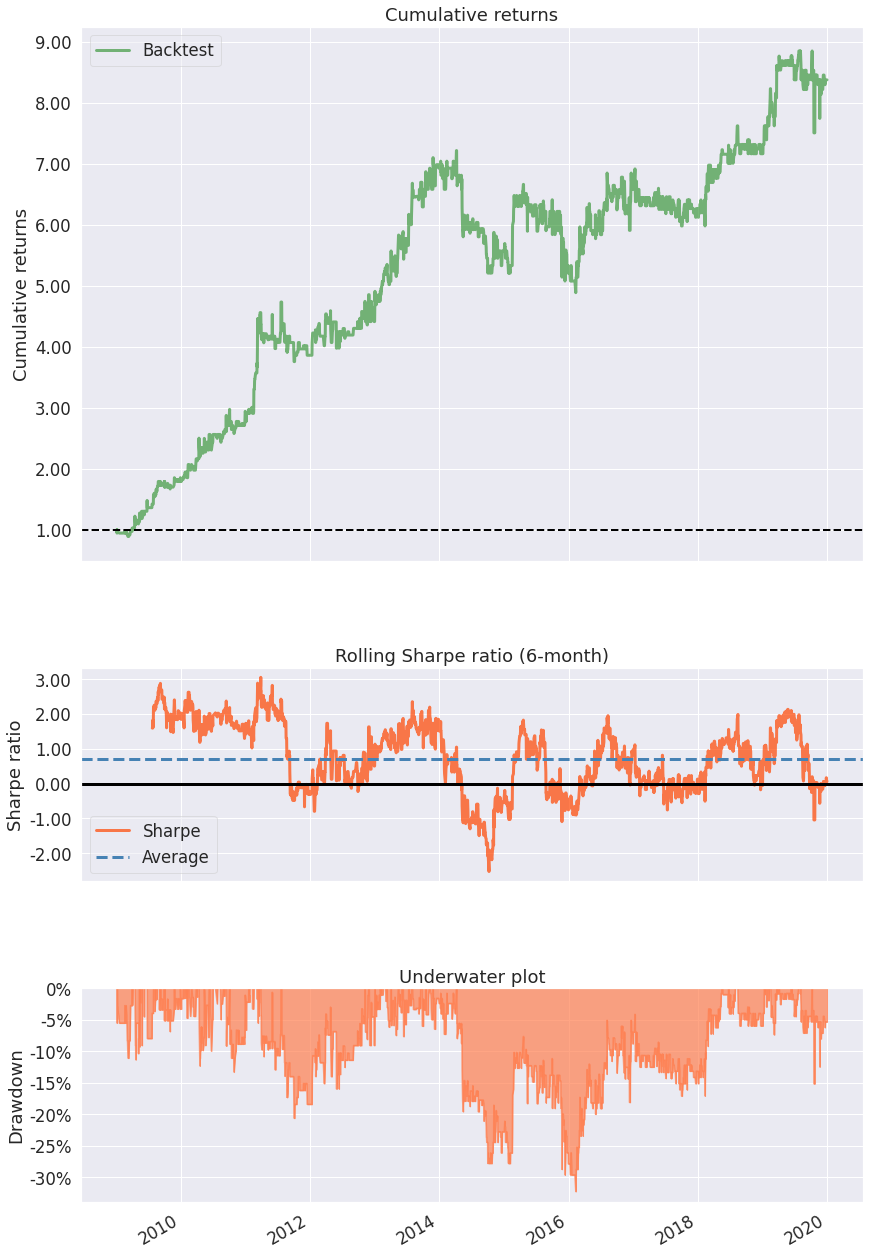

In [70]:
pf.create_simple_tear_sheet(Challenger_return_ts)

## UMS Holdings Limited

In [148]:
UMS_data = pdr.get_data_yahoo("558.SI", start="2009-01-01", end="2019-12-31")
UMS_close = UMS_data["Close"]
UMS_adj_close = UMS_data["Adj Close"]
UMS_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-02    0.05376
2009-01-05    0.05376
2009-01-06    0.05888
2009-01-07    0.05888
2009-01-08    0.05888
Name: Close, dtype: float64

In [149]:
# check if 10x

round((UMS_close.tail(1).values / UMS_close.head(1).values)[0], 3)

15.179

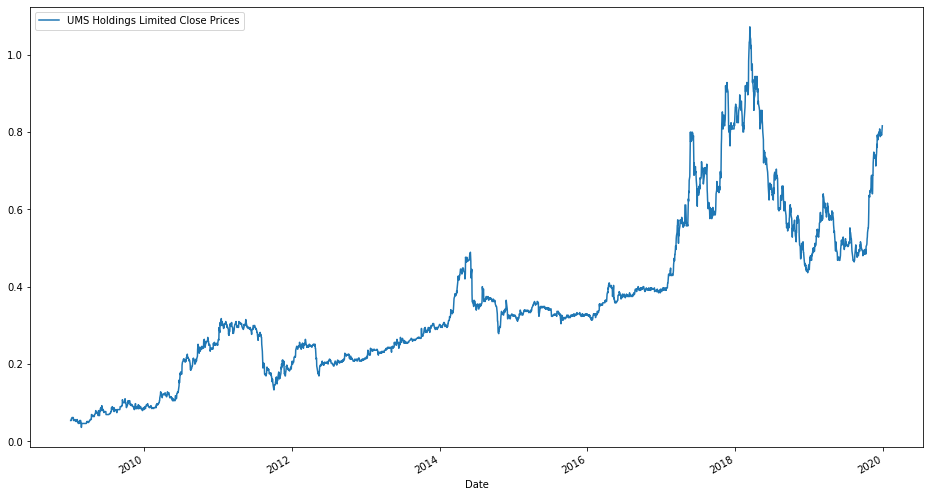

In [150]:
UMS_close.plot(label="UMS Holdings Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [151]:
# pct change

UMS_pct_change = UMS_close.pct_change()
UMS_pct_change.head()

Date
2009-01-02         NaN
2009-01-05    0.000000
2009-01-06    0.095238
2009-01-07    0.000000
2009-01-08    0.000000
Name: Close, dtype: float64

In [152]:
# which day had the worst single day returns

UMS_pct_change.idxmin()

Timestamp('2009-02-24 00:00:00')

In [153]:
# which day had the best single day returns

UMS_pct_change.idxmax()

Timestamp('2009-04-15 00:00:00')

In [154]:
# std to assess risk

UMS_pct_change.std()

0.02767549708944067

In [158]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [159]:
UMS_sma_30 = UMS_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
UMS_wma_30 = UMS_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
UMS_ema_30 = UMS_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

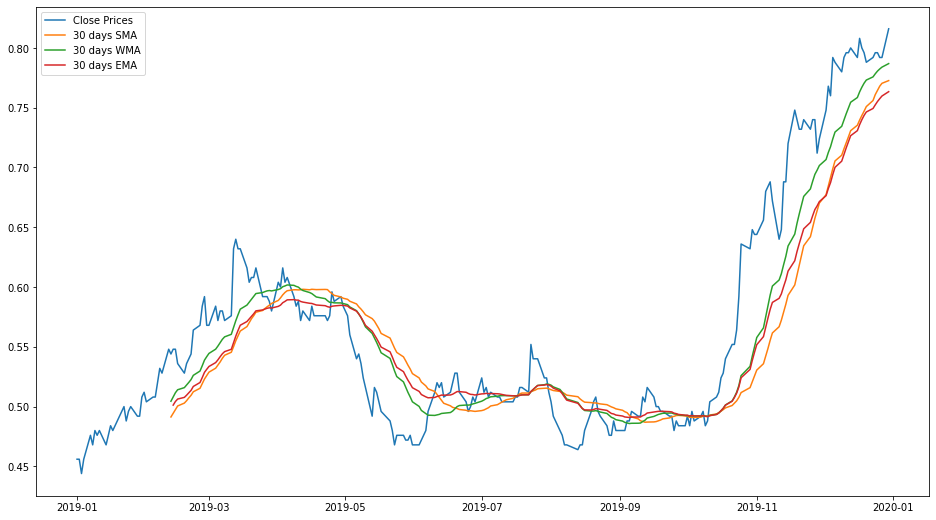

In [160]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(UMS_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(UMS_sma_30, label='30 days SMA')
ax.plot(UMS_wma_30, label='30 days WMA')
ax.plot(UMS_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [162]:
UMS_return_series = ((1 + UMS_adj_close.pct_change()).cumprod() - 1)
UMS_return_series

Date
2009-01-02          NaN
2009-01-05     0.000000
2009-01-06     0.095239
2009-01-07     0.095239
2009-01-08     0.095239
                ...    
2019-12-24    30.615512
2019-12-25    30.615512
2019-12-26    30.456643
2019-12-27    30.456643
2019-12-30    31.409868
Name: Adj Close, Length: 2760, dtype: float64

In [163]:
UMS_annualized_return = ((1+UMS_return_series.tail(1))**(1/10))-1
UMS_annualized_return*100

Date
2019-12-30    41.601458
Name: Adj Close, dtype: float64

In [164]:
UMS_volatility = np.sqrt(np.log(UMS_close / UMS_close.shift(1)).var()) * np.sqrt(252)
UMS_volatility

0.4381172199919881

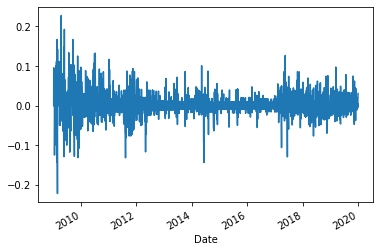

In [165]:
UMS_return_ts =UMS_adj_close.pct_change().dropna()
UMS_return_ts.plot()
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-05
End date,2019-12-30
Total months,131
,Backtest
Annual return,37.4%
Cumulative returns,3141.0%
Annual volatility,43.6%
Sharpe ratio,0.95
Calmar ratio,0.65
Stability,0.88
Max drawdown,-57.5%


C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


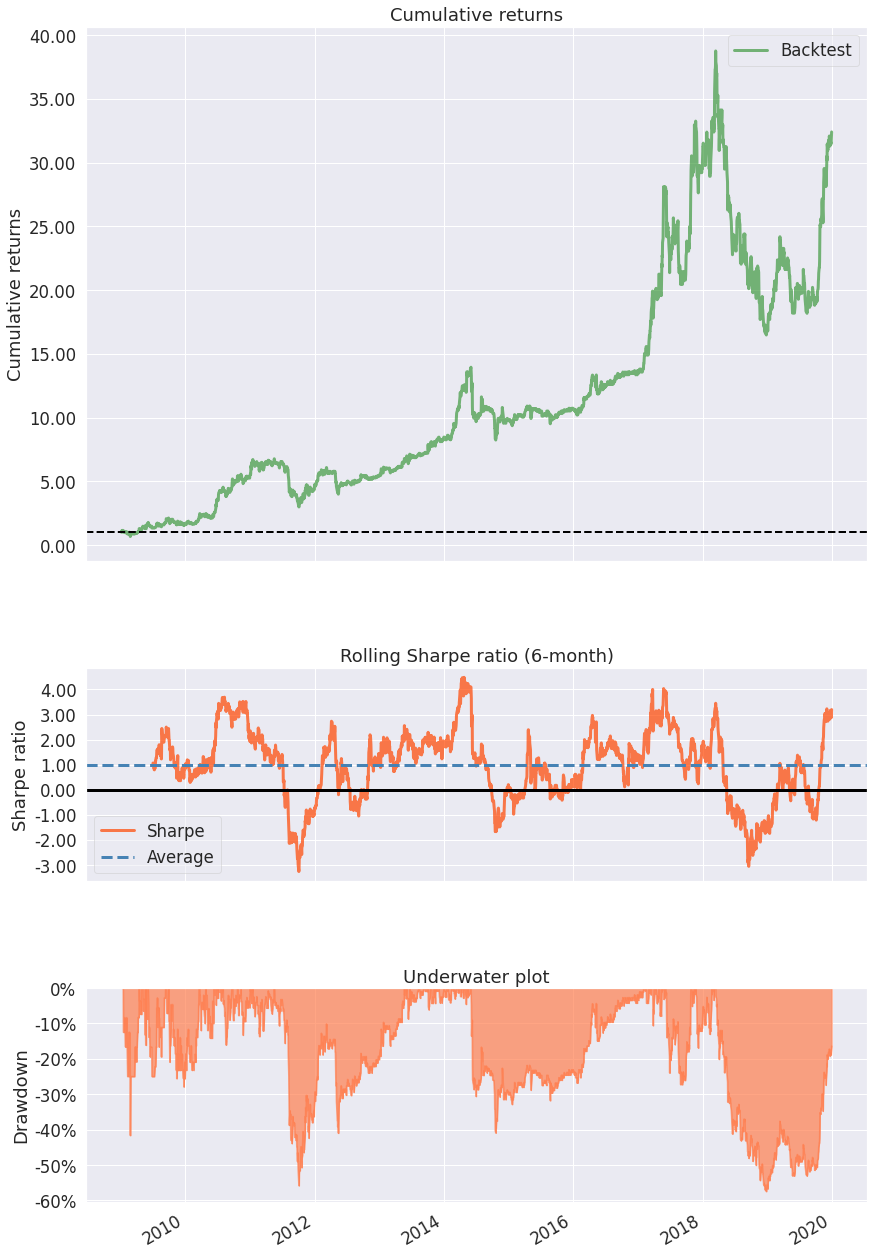

In [166]:
pf.create_simple_tear_sheet(UMS_return_ts)

## Valuetronics Holdings Limited

In [167]:
BN2_data = pdr.get_data_yahoo("BN2.SI", start="2009-01-01", end="2019-12-31")
BN2_close = BN2_data["Close"]
BN2_adj_close = BN2_data["Adj Close"]
BN2_close.head()

[*********************100%***********************]  1 of 1 completed


Date
2009-01-05    0.072727
2009-01-07    0.077272
2009-01-09    0.072727
2009-01-14    0.072727
2009-01-19    0.090909
Name: Close, dtype: float64

In [168]:
# check if 10x

round((BN2_close.tail(1).values / BN2_close.head(1).values)[0], 3)

11.413

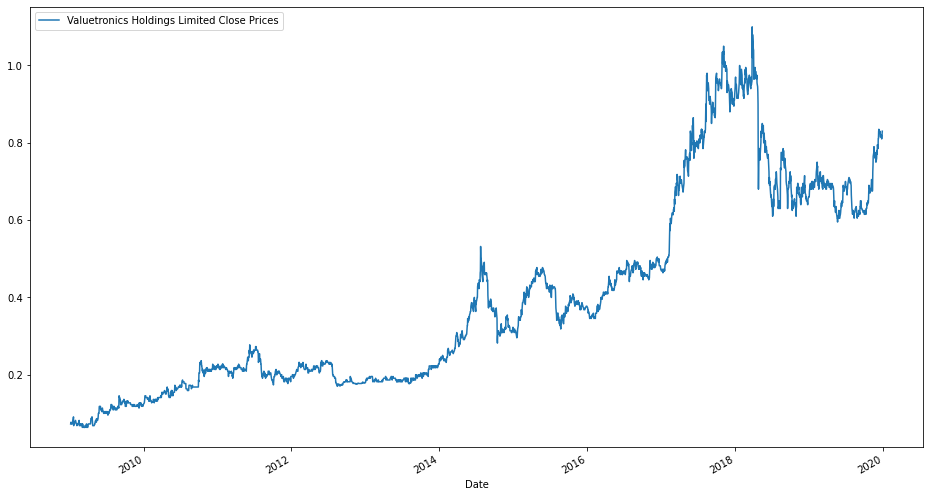

In [169]:
BN2_close.plot(label="Valuetronics Holdings Limited Close Prices", figsize=(16, 9))
plt.legend()
plt.show()

In [170]:
# pct change

BN2_pct_change = BN2_close.pct_change()
BN2_pct_change.head()

Date
2009-01-05         NaN
2009-01-07    0.062494
2009-01-09   -0.058818
2009-01-14    0.000000
2009-01-19    0.250003
Name: Close, dtype: float64

In [171]:
# which day had the worst single day returns

BN2_pct_change.idxmin()

Timestamp('2009-01-20 00:00:00')

In [172]:
# which day had the best single day returns
BN2_pct_change.idxmax()

Timestamp('2009-09-01 00:00:00')

In [173]:
# std to assess risk

BN2_pct_change.std()

0.028250581683427117

In [174]:
weights = np.arange(1,31) #this creates an array with integers 1 to 30 included

In [175]:
BN2_sma_30 = BN2_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).mean()
BN2_wma_30 = BN2_close.loc["2019-01-01":"2019-12-31"].rolling(window=30).apply(lambda prices: np.dot(prices, weights)/weights.sum(), raw=True)
BN2_ema_30 = BN2_close.loc["2019-01-01":"2019-12-31"].ewm(span=30, adjust=False).mean()

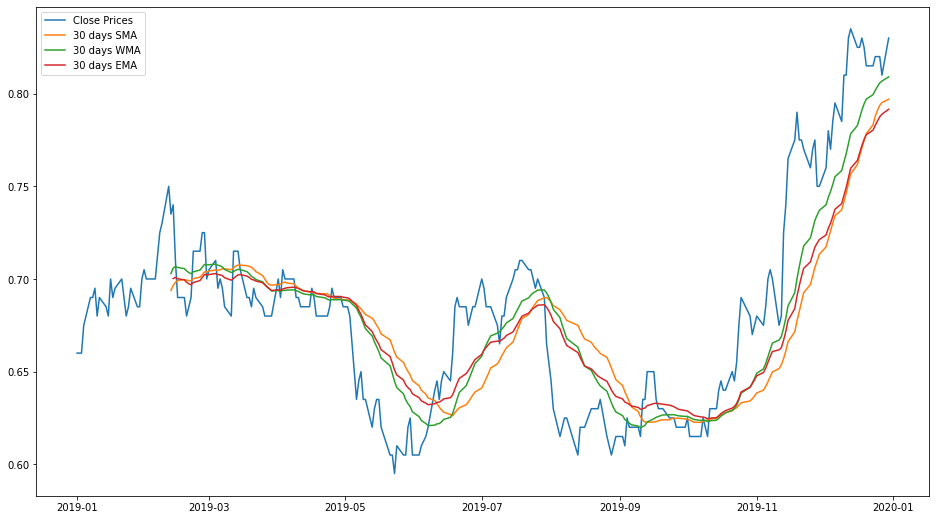

In [176]:
# plot against moving averages (simple, weighted and exponential for 30 days) for 2019

fig, ax = plt.subplots(figsize=(16,9))
ax.plot(BN2_close.loc["2019-01-01":"2019-12-31"], label='Close Prices')
ax.plot(BN2_sma_30, label='30 days SMA')
ax.plot(BN2_wma_30, label='30 days WMA')
ax.plot(BN2_ema_30[30:], label='30 days EMA')

plt.legend()
plt.show()

In [178]:
BN2_return_series = ((1 + BN2_adj_close.pct_change()).cumprod() - 1)
BN2_return_series

Date
2009-01-05           NaN
2009-01-07      0.062494
2009-01-09      0.000000
2009-01-14      0.000000
2009-01-19      0.250003
                 ...    
2019-12-24    191.416227
2019-12-25    191.416227
2019-12-26    191.416227
2019-12-27    189.069692
2019-12-30    193.762784
Name: Adj Close, Length: 2722, dtype: float64

In [180]:
BN2_annualized_return = ((1+BN2_return_series.tail(1))**(1/10))-1
BN2_annualized_return*100

Date
2019-12-30    69.414507
Name: Adj Close, dtype: float64

In [181]:
BN2_volatility = np.sqrt(np.log(BN2_close / BN2_close.shift(1)).var()) * np.sqrt(252)
BN2_volatility

0.4455934186237475

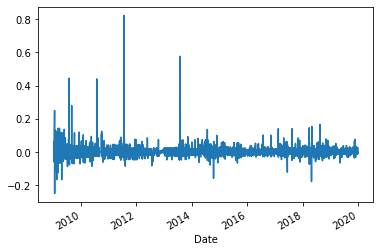

In [182]:
BN2_return_ts = BN2_adj_close.pct_change().dropna()
BN2_return_ts.plot()
plt.show()

C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\timeseries.py:724: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  stats = pd.Series()


Start date,2009-01-07
End date,2019-12-30
Total months,129
,Backtest
Annual return,62.9%
Cumulative returns,19376.3%
Annual volatility,57.4%
Sharpe ratio,1.10
Calmar ratio,1.41
Stability,0.94
Max drawdown,-44.5%


C:\Users\wei-d\anaconda3\lib\site-packages\pyfolio\plotting.py:805: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  oos_cum_returns = pd.Series([])


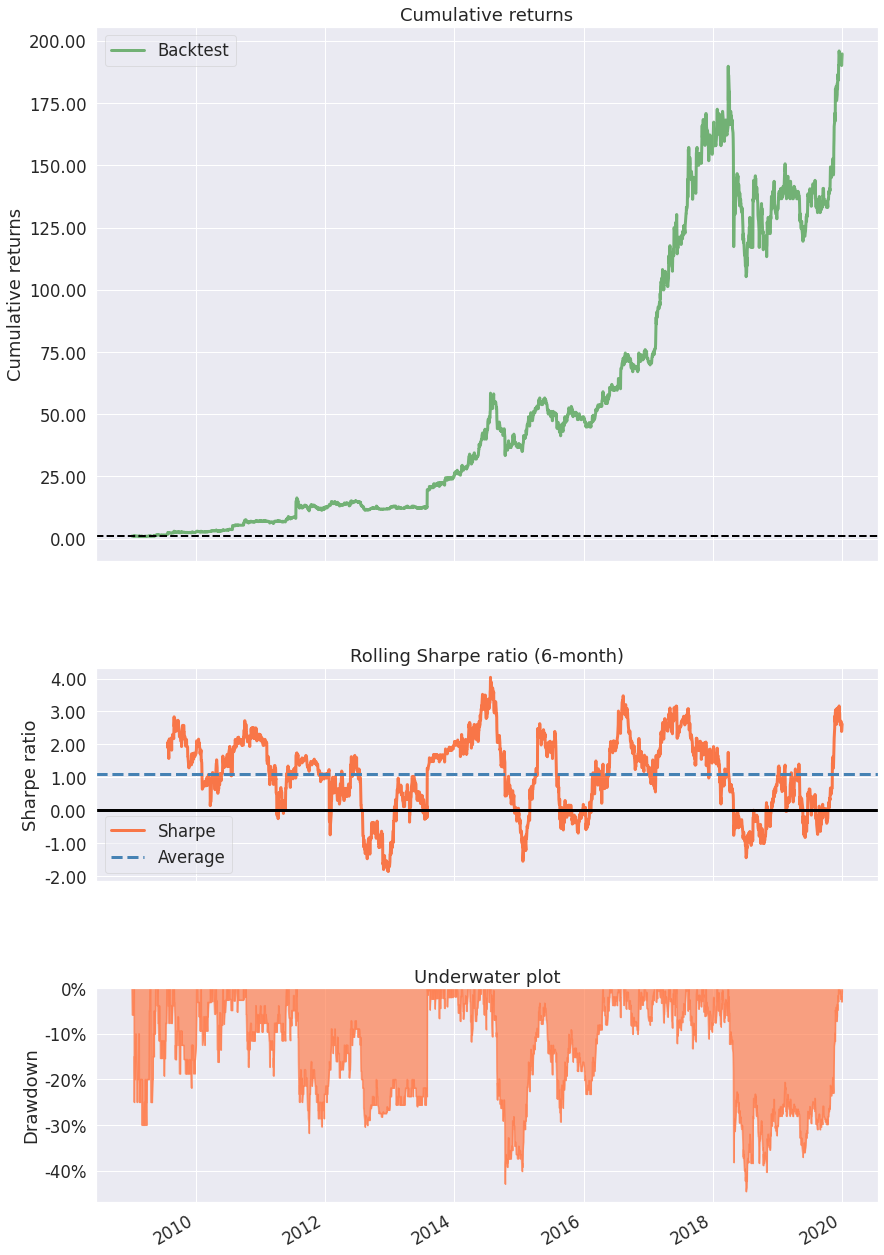

In [183]:
pf.create_simple_tear_sheet(BN2_return_ts)

In [ ]:
### TEST 

In [147]:
QC7_data = pdr.get_data_yahoo("BS6.SI", start="2009-01-01", end="2019-12-31")
QC7_close =QC7_data["Close"]
QC7_adj_close = QC7_data["Adj Close"]
QC7_close.head()

round((QC7_close.tail(1).values / QC7_close.head(1).values)[0], 3)

[*********************100%***********************]  1 of 1 completed


2.379

In [ ]:
558, BN2

In [ ]:
C41, E28, H13, H30, M44U, BTM, BCY, AP4, AGS, T14